
#### `Prediction of wine quality towards fullfilment of IME672 course project`

#### Importing required libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.model_selection import cross_val_score ,train_test_split, GridSearchCV , KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

matplotlib.rcParams['figure.figsize'] = (10,5)
matplotlib.rcParams['figure.dpi'] = 300

#### Importing dataset

In [2]:
#rdf = pd.read_csv("E:\\MTech\\Summer Term\\DM & KD\\Project\\winequality-red.csv", delimiter=';')
#wdf = pd.read_csv("E:\\MTech\\Summer Term\\DM & KD\\Project\\winequality-white.csv", delimiter=';')
rdf = pd.read_csv("winequality-red.csv", delimiter=';')
wdf = pd.read_csv("winequality-white.csv", delimiter=';')

In [3]:
rdf['type'] = 0
rdf.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  type  
0      9.4        5     0  
1      9.8        5     0  
2      9.8        5     0  
3      9.8        6     0  
4      9.4        5     0

In [4]:
wdf['type'] = 1
wdf.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  type  
0      8.8        6     1  
1      9.5        6     1  
2     10.1        6     1  
3      9.9        6     1  
4      9.9        6     1

# <font color = 'aqua'> Data Preprocessesing

#### Checking data types

In [5]:
df = pd.concat([rdf, wdf])
df.sample(9)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1547            6.3             0.600         0.10            1.60      0.048   
576             8.2             0.230         0.29            1.80      0.047   
4052            6.2             0.240         0.22            7.90      0.053   
4521            6.3             0.360         0.20            2.00      0.048   
1223            8.0             0.280         0.42            7.10      0.045   
1260            6.4             0.230         0.30            7.10      0.037   
1127            6.4             0.125         0.29            5.85      0.042   
3941            4.9             0.345         0.34            1.00      0.068   
1081            7.9             0.300         0.68            8.30      0.050   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1547                 12.0                  26.0  0.99306  3.55       0.51   
576                  47.0                 187.0  0.99330  3.13       0.50   
4052                 45.0                 149.0  0.99545  3.23       0.52   
4521                 48.0                 191.0  0.99290  3.17       0.51   
1223                 41.0                 169.0  0.99590  3.17       0.43   
1260                 63.0                 236.0  0.99520  3.06       0.34   
1127                 24.0                  99.0  0.99200  3.23       0.32   
3941                 32.0                 143.0  0.99138  3.24       0.40   
1081                 37.5                 289.0  0.99316  3.01       0.51   

      alcohol  quality  type  
1547     12.1        5     0  
576      10.2        6     1  
4052      9.3        5     1  
4521      9.6        5     1  
1223     10.6        5     1  
1260      9.2        6     1  
1127     12.0        7     1  
3941     10.1        5     1  
1081     12.3        7     0

In [6]:
df.shape

(6497, 13)

In [7]:
df.duplicated().value_counts()

False    5320
True     1177
dtype: int64

<font color = 'darkorange'> We found `1177 duplicated rows` and we are dropping it now 

In [8]:
df.drop_duplicates(inplace  = True)

In [9]:
df.shape

(5320, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  type                  5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 581.9 KB


#### Checking for null values

In [11]:
print('Total null values in dataset: ', df.isnull().sum().sum())

Total null values in dataset:  0


#### Checking stats of datasets

In [12]:
print('Wine data stats ')
df.describe()

Wine data stats 


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5320.000000       5320.000000  5320.000000     5320.000000   
mean        7.215179          0.344130     0.318494        5.048477   
std         1.319671          0.168248     0.147157        4.500180   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.240000        1.800000   
50%         7.000000          0.300000     0.310000        2.700000   
75%         7.700000          0.410000     0.400000        7.500000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5320.000000          5320.000000           5320.000000  5320.000000   
mean      0.056690            30.036654            114.109023     0.994535   
std       0.036863            17.805045             56.774223     0.002966   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            16.000000             74.000000     0.992200   
50%       0.047000            28.000000            116.000000     0.994650   
75%       0.066000            41.000000            153.250000     0.996770   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality         type  
count  5320.000000  5320.000000  5320.000000  5320.000000  5320.000000  
mean      3.224664     0.533357    10.549241     5.795677     0.744549  
std       0.160379     0.149743     1.185933     0.879772     0.436155  
min       2.720000     0.220000     8.000000     3.000000     0.000000  
25%       3.110000     0.430000     9.500000     5.000000     0.000000  
50%       3.210000     0.510000    10.400000     6.000000     1.000000  
75%       3.330000     0.600000    11.400000     6.000000     1.000000  
max       4.010000     2.000000    14.900000     9.000000     1.000000

Dropping `Density` column

In [13]:
df.drop('density', axis=1, inplace = True)

<font color = 'teal'>From above data description we can conclude that value of density is almost similar throughout the dataset, because mean, min, 25%, 50%, 75% are all ~0.99.
So I am choosing to drop density feature as it will not have much significance in predicting quality of wine.


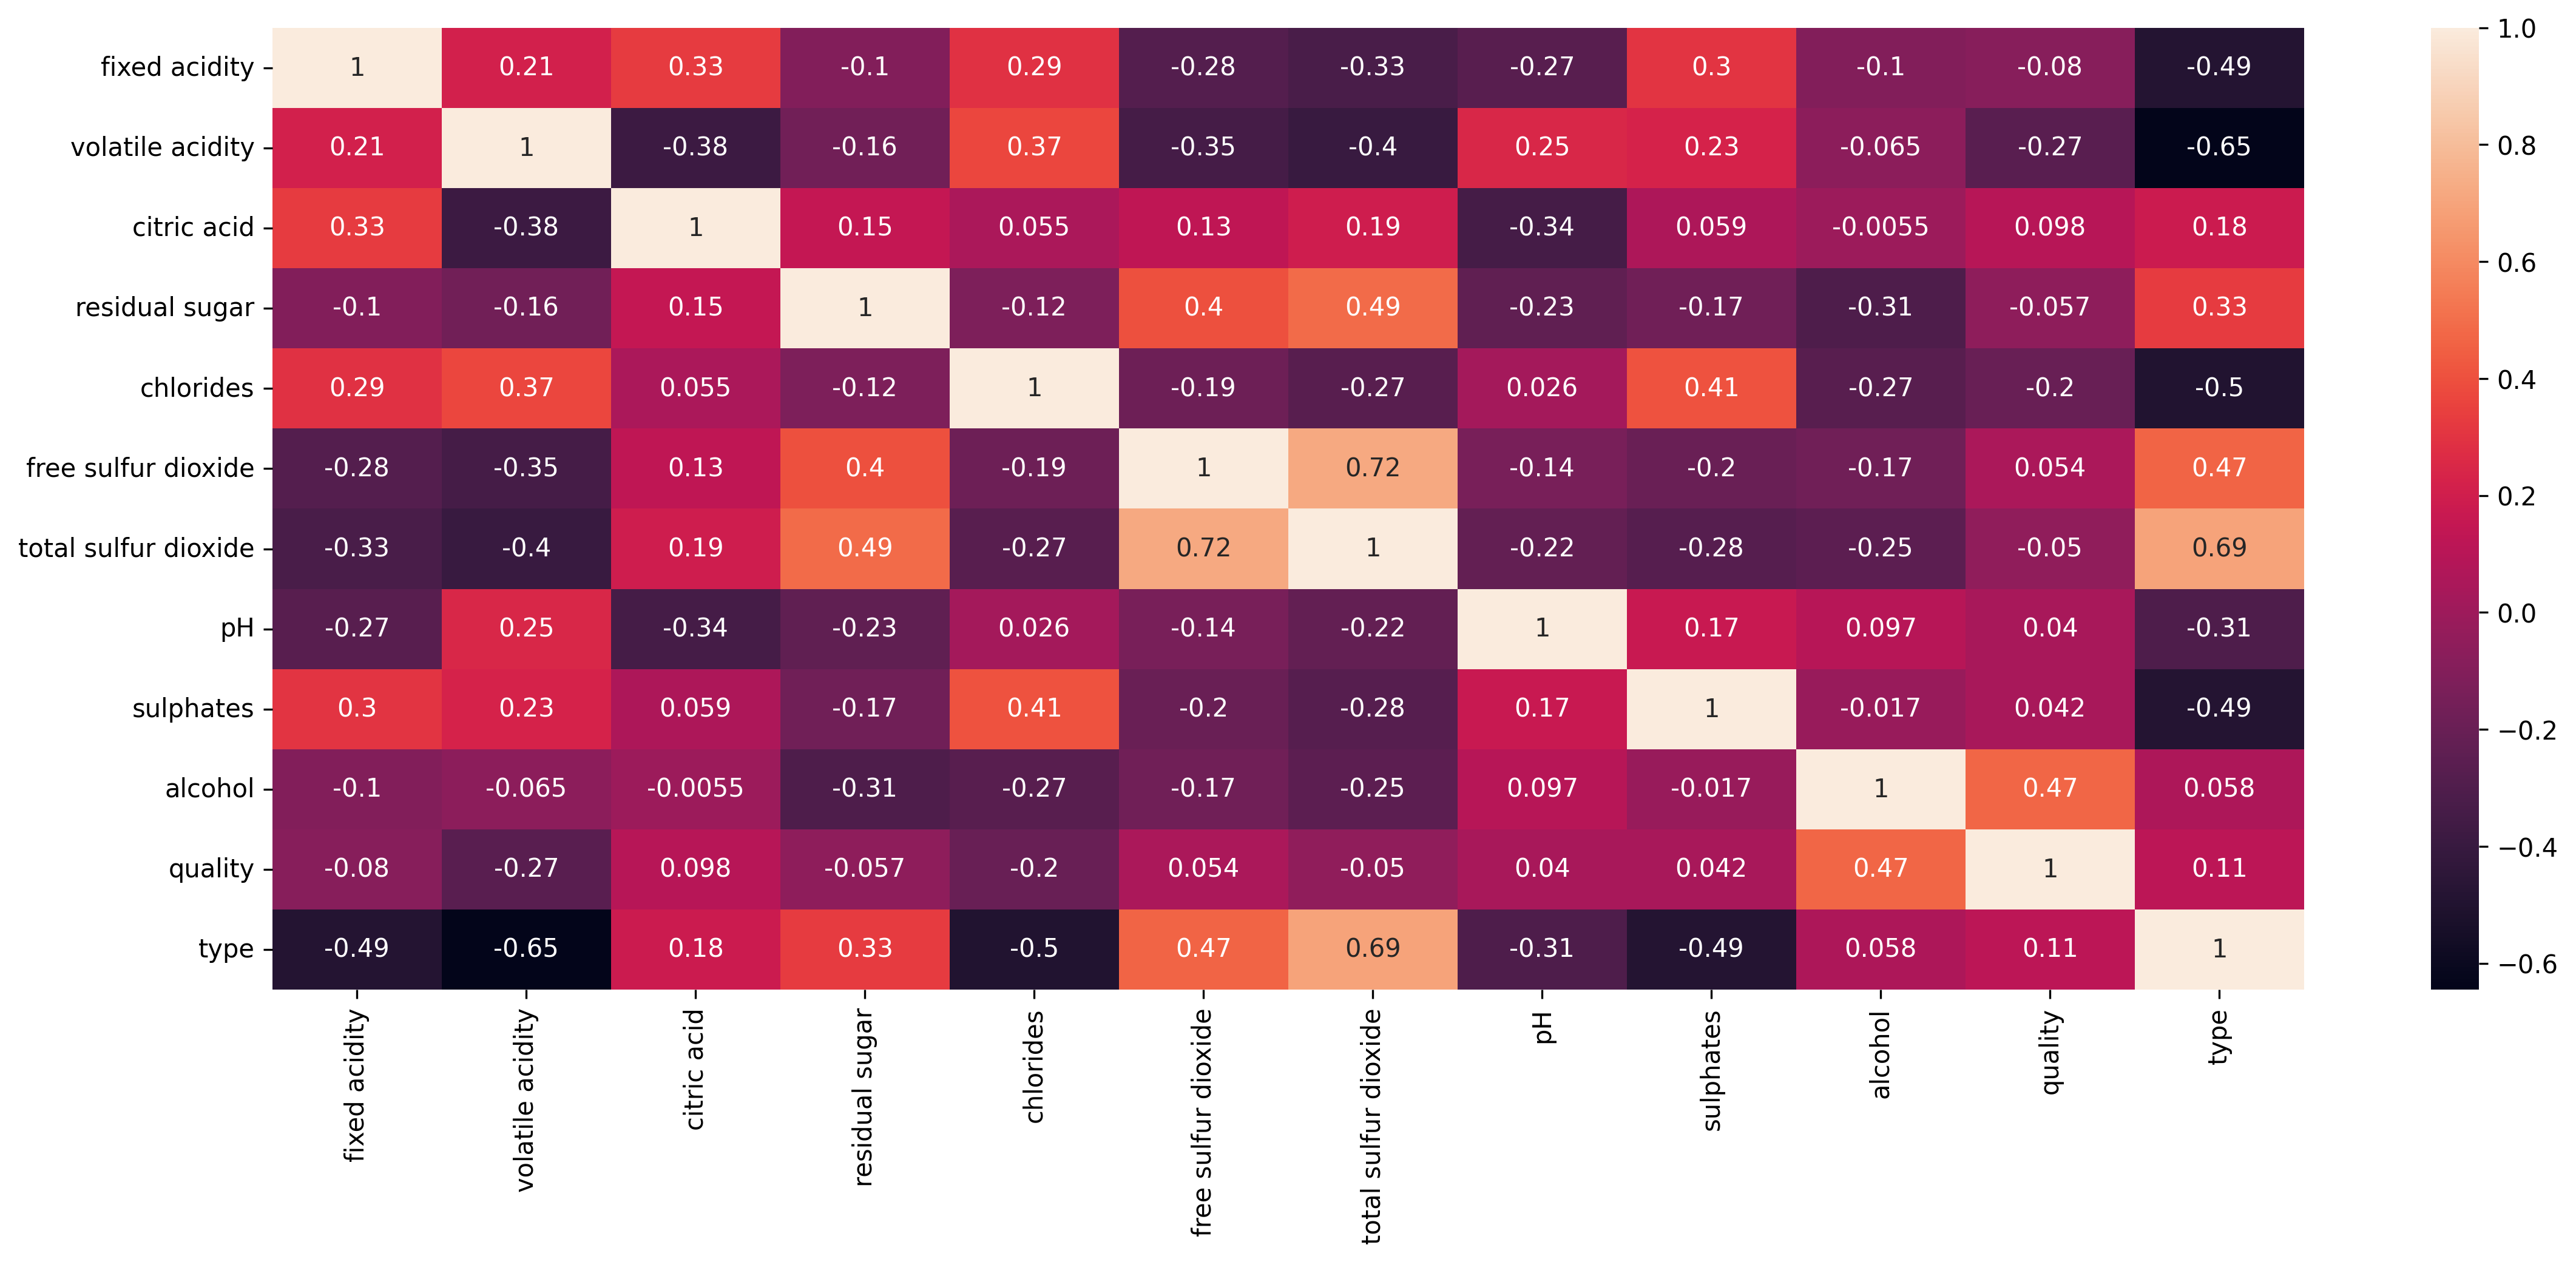

In [14]:
plt.figure(figsize=[18,7])
sns.heatmap(df.corr(),annot=True)
plt.show()

<font color = 'teal'>Checking features with high correlation and droping that attribute

In [15]:
for i in range(len(df.corr().drop('type'))):
  for j in range(i):
    if abs(df.corr().iloc[i,j]) > 0.65:
      colm = df.corr().columns[i]
      print(colm)

total sulfur dioxide


In [16]:
df.drop('total sulfur dioxide', axis=1, inplace = True)
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide    pH  sulphates  alcohol  quality  type  
0                 11.0  3.51       0.56      9.4        5     0  
1                 25.0  3.20       0.68      9.8        5     0  
2                 15.0  3.26       0.65      9.8        5     0  
3                 17.0  3.16       0.58      9.8        6     0  
5                 13.0  3.51       0.56      9.4        5     0

In [17]:
df.shape

(5320, 11)

## <font color = 'teal'> Data Visualization

##### a) Number of values for each quality in wine dataset

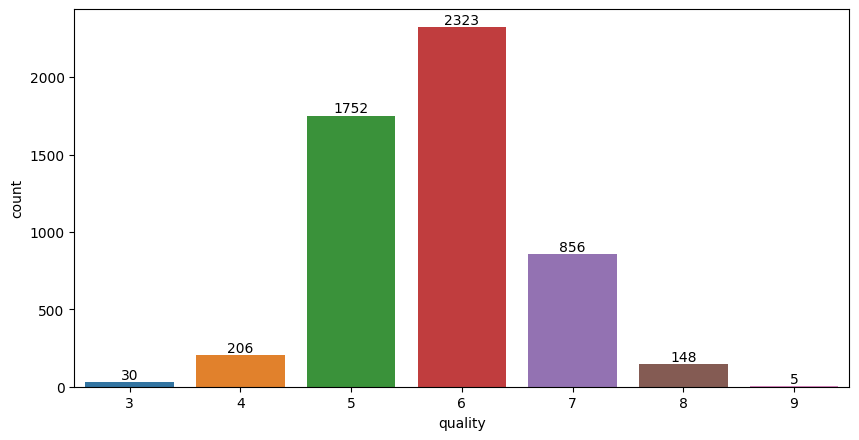

In [18]:
fig, axes = plt.subplots(figsize=(10,5),dpi=100)
ax = sns.countplot(data=df, x='quality', ax=axes)

for i in ax.containers:
    ax.bar_label(i)

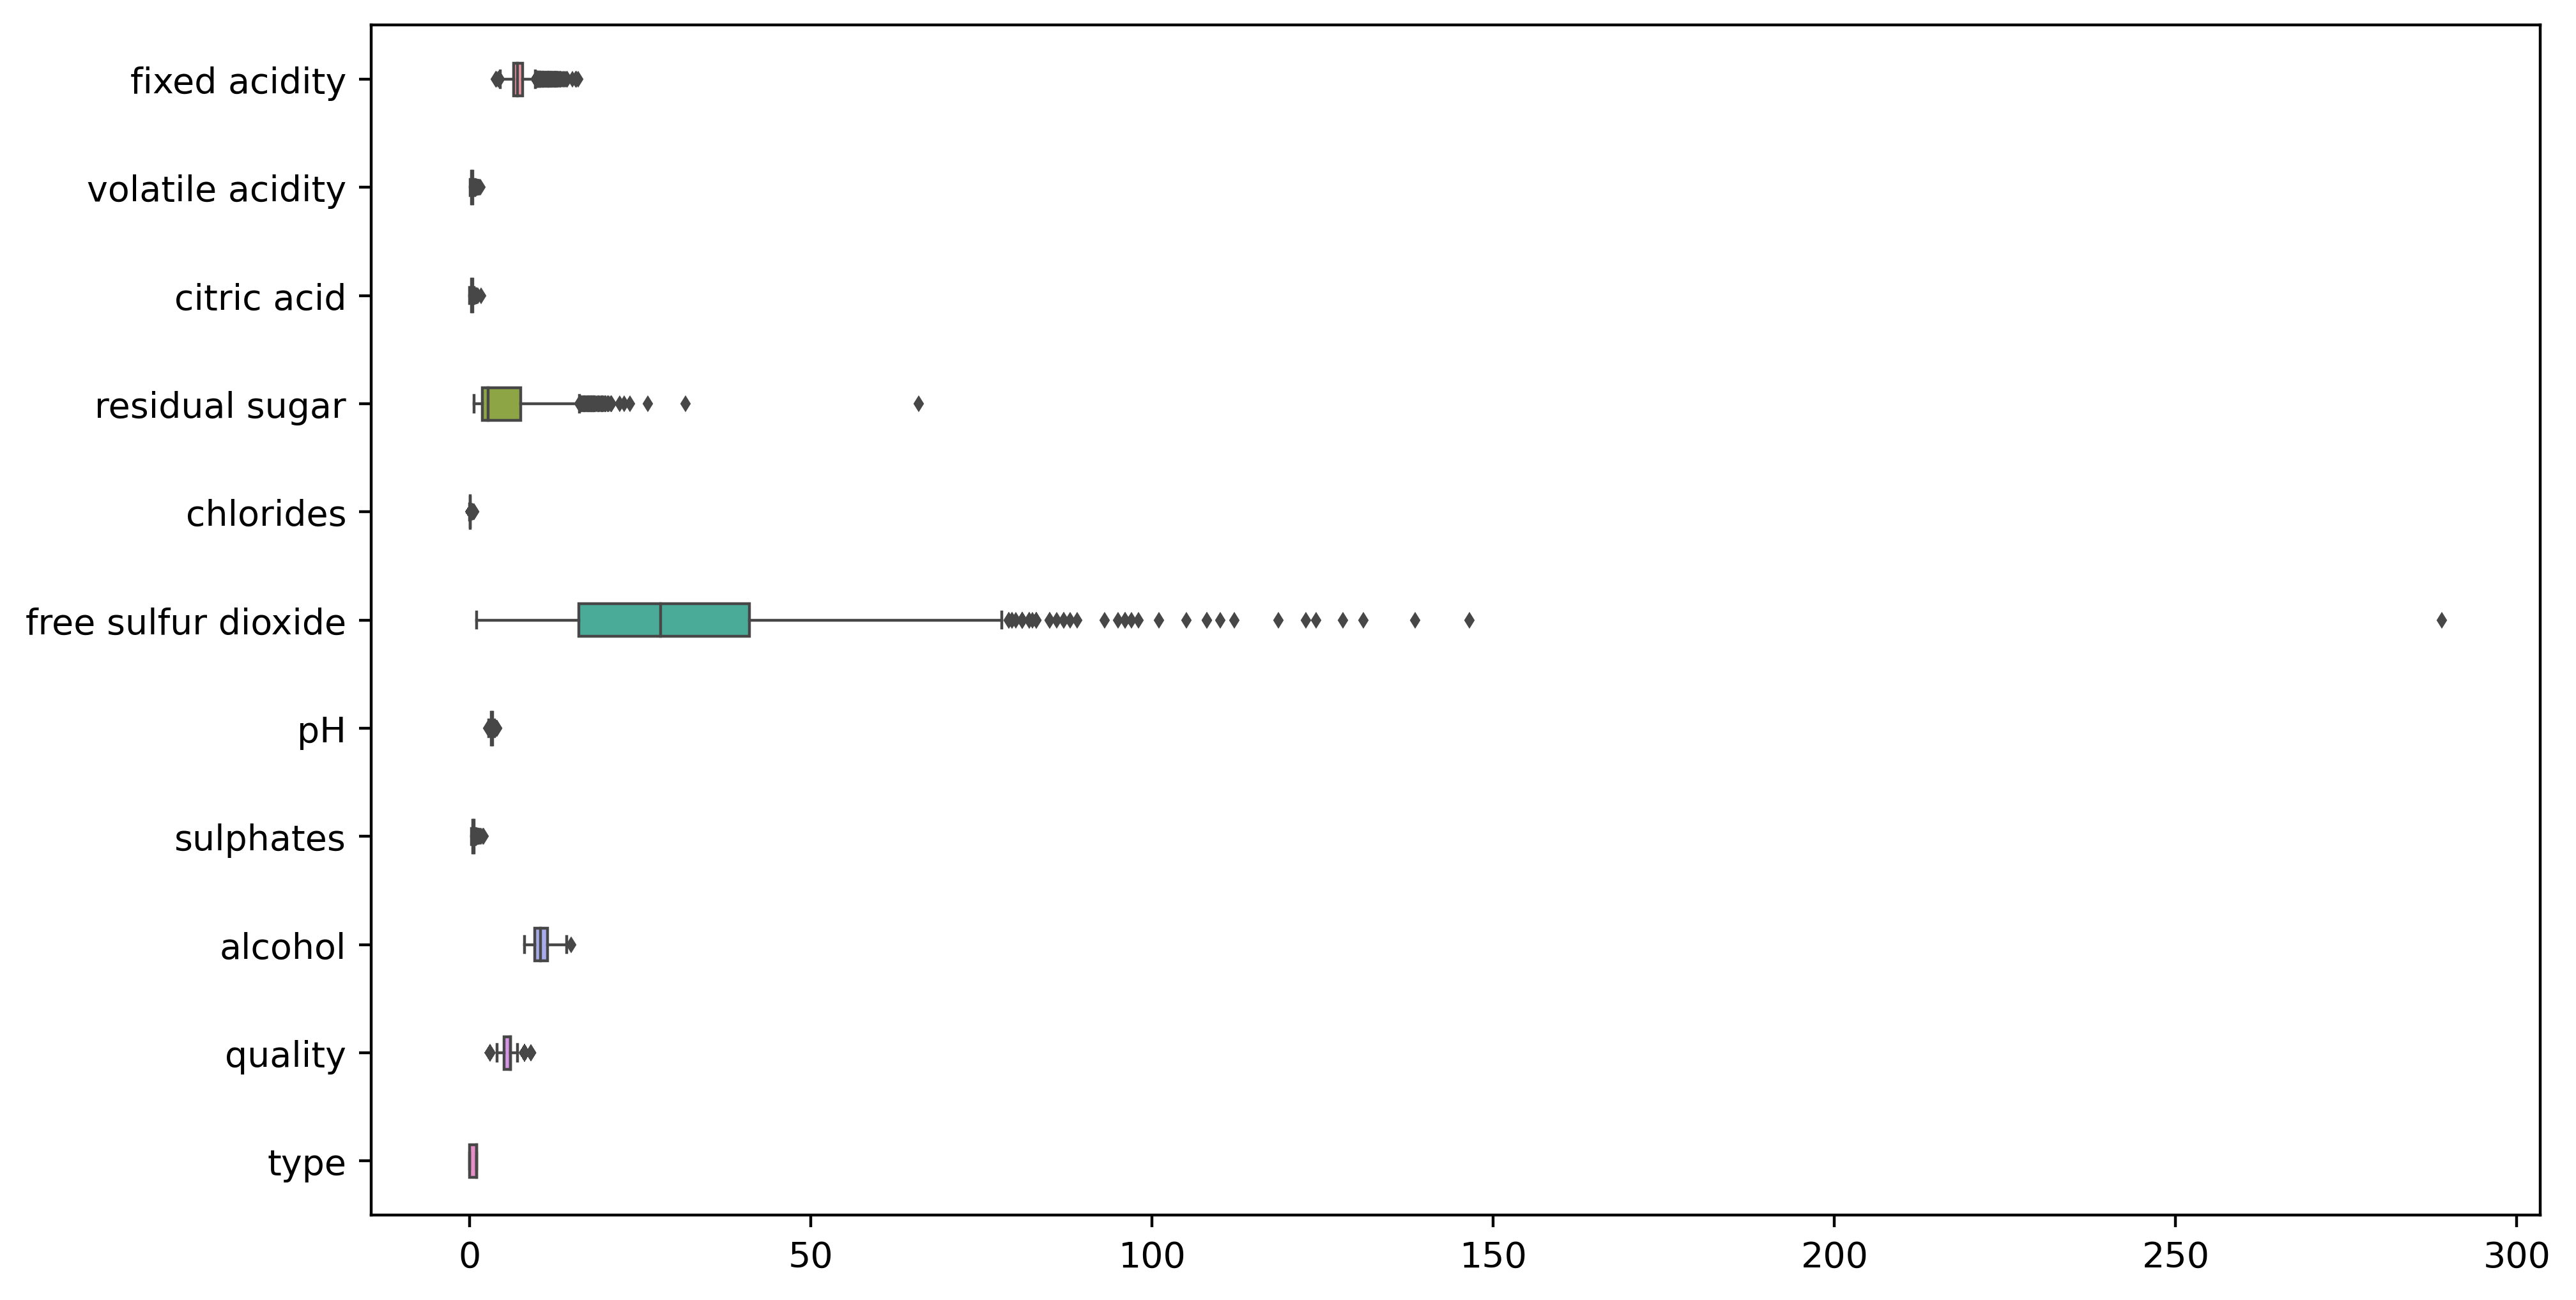

In [19]:
plt.figure(dpi=400)
sns.boxplot(data=df, orient='h', linewidth=0.8, fliersize=2 ,width=-0.3)
plt.tight_layout(pad=0.4)

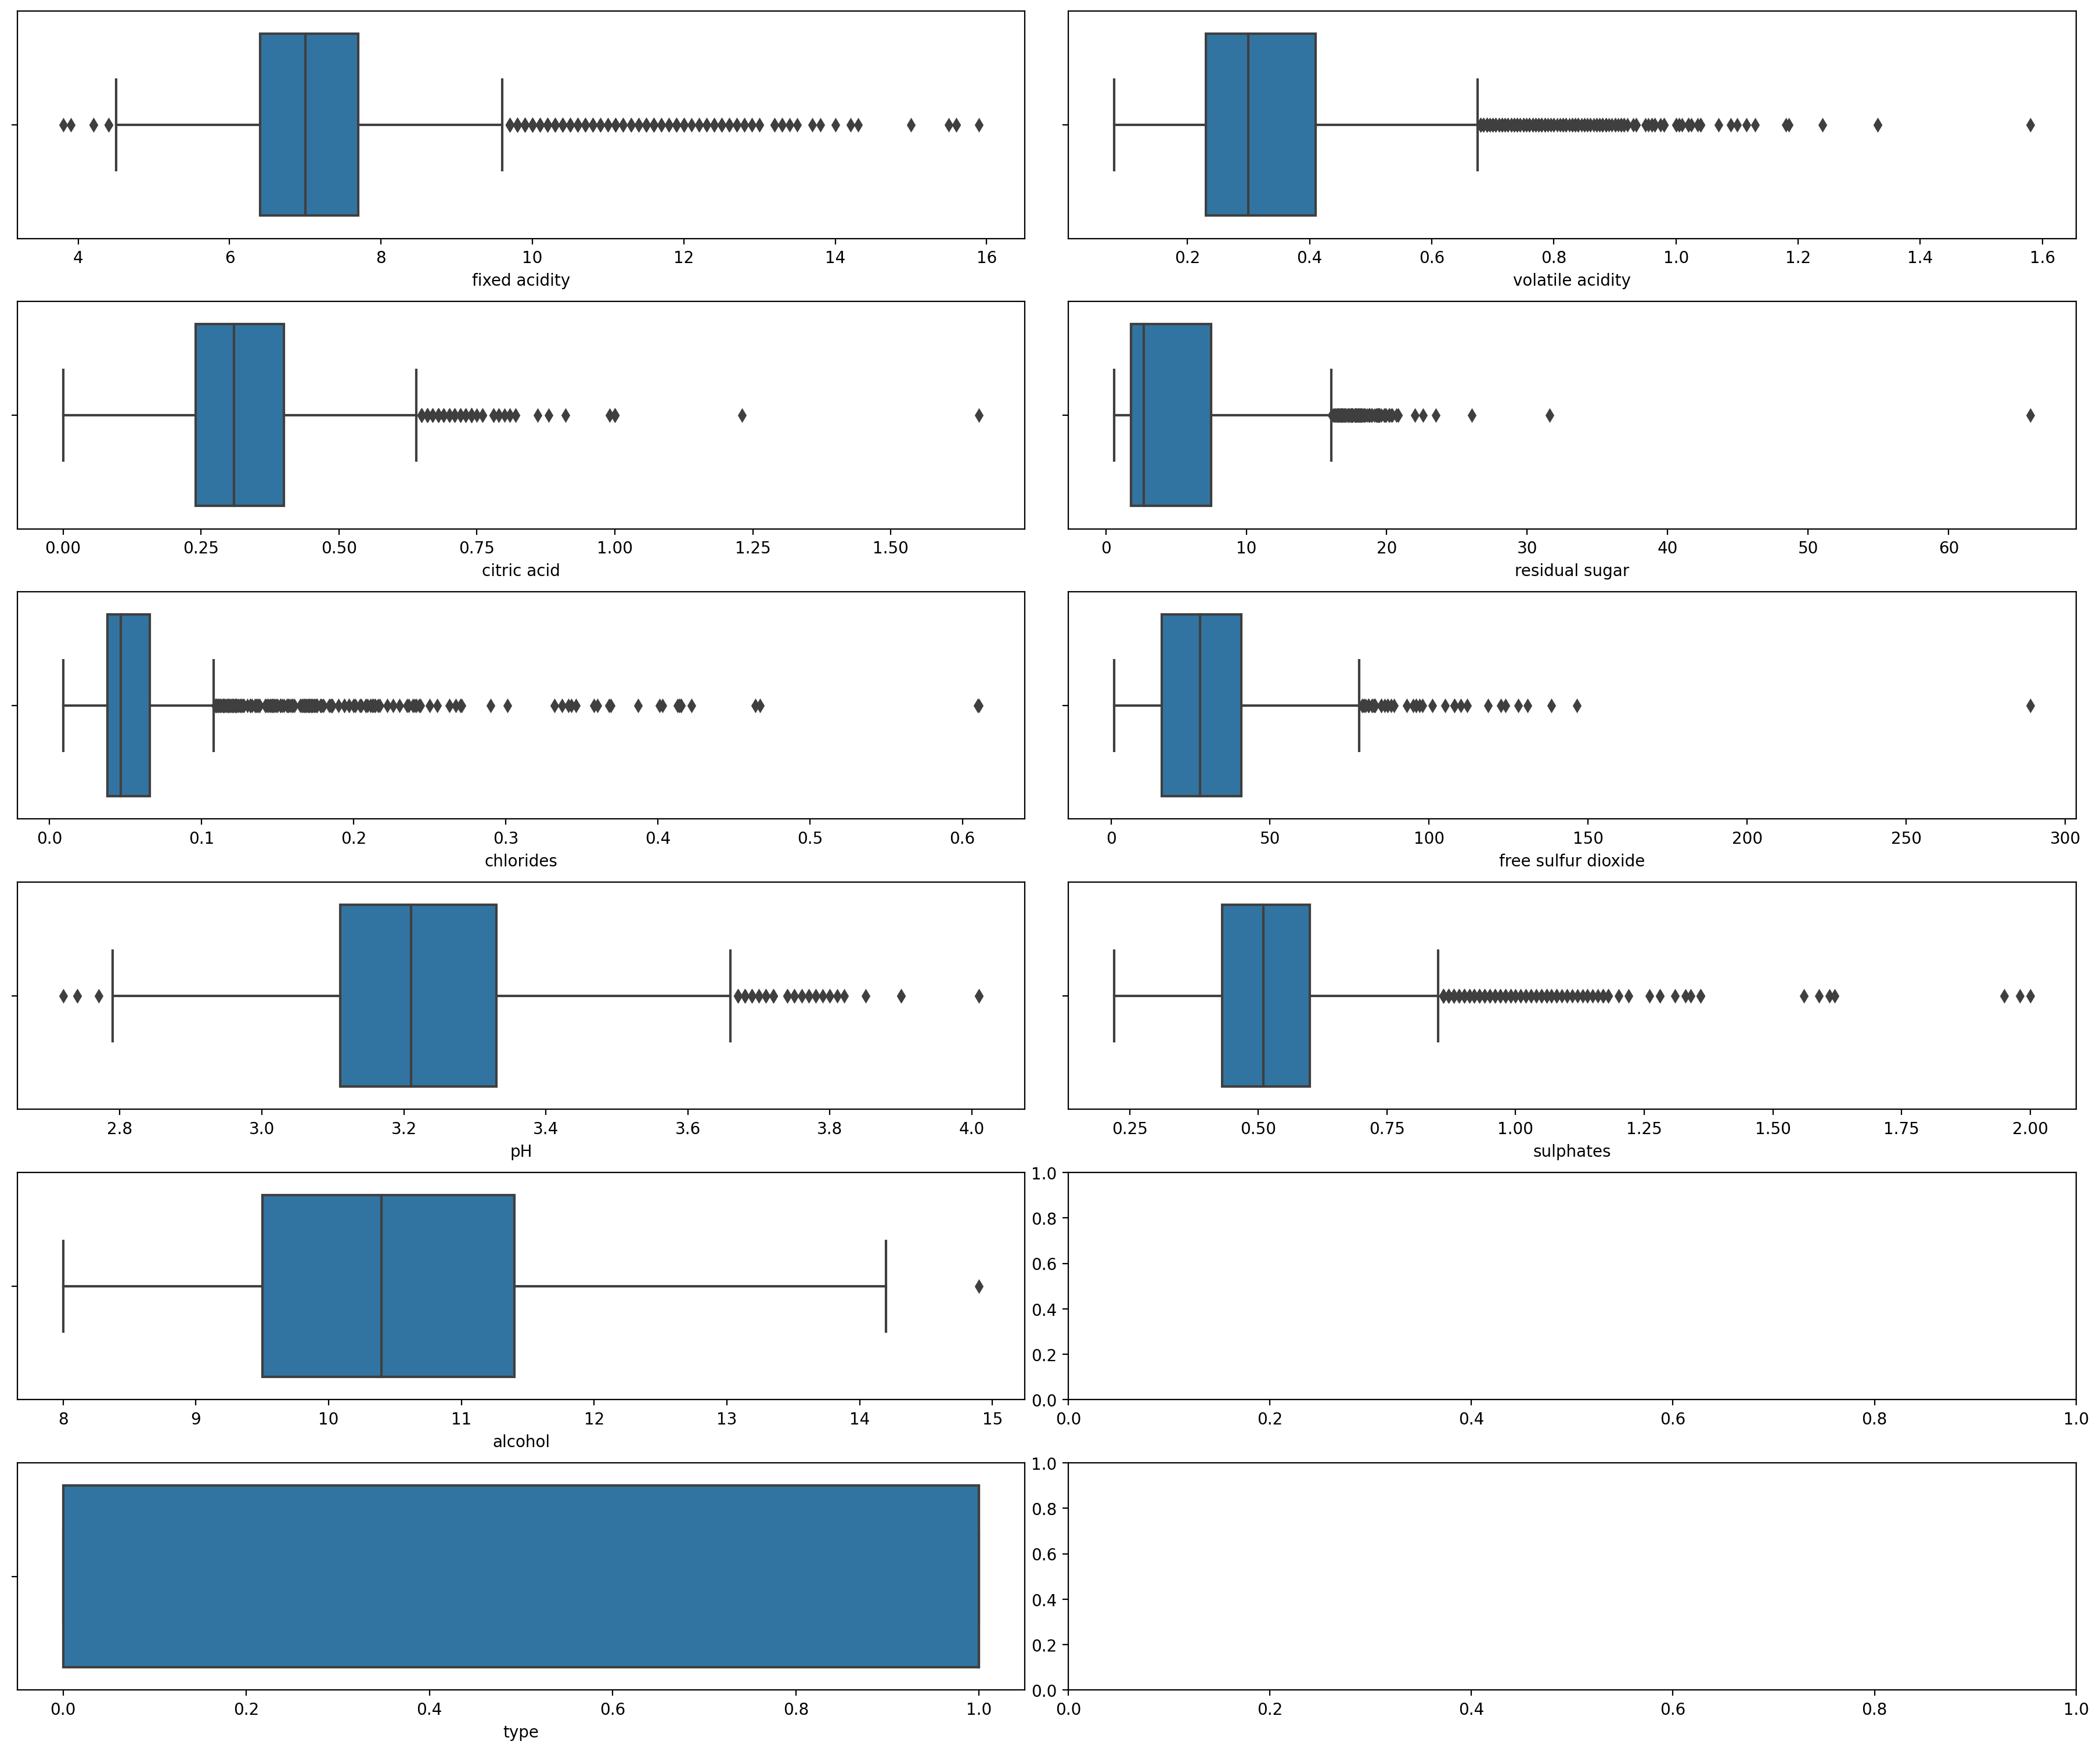

In [20]:
fig, ax = plt.subplots(ncols=2, nrows=6, figsize=(18, 15), dpi =200)
ax = ax.flatten()
index = 0
for i in df.columns:
    if i != 'quality':
        sns.boxplot(x=i, data=df, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

#### <font color = 'orange'> The data is rifed with outliers. But these oultiers can also be the sepcific reasons about why some wine as better while others aren't

## ----------

## Plots output for wine dataset to identify outliers visually

#### Ploting bar plot for all attributes vs quality of wine

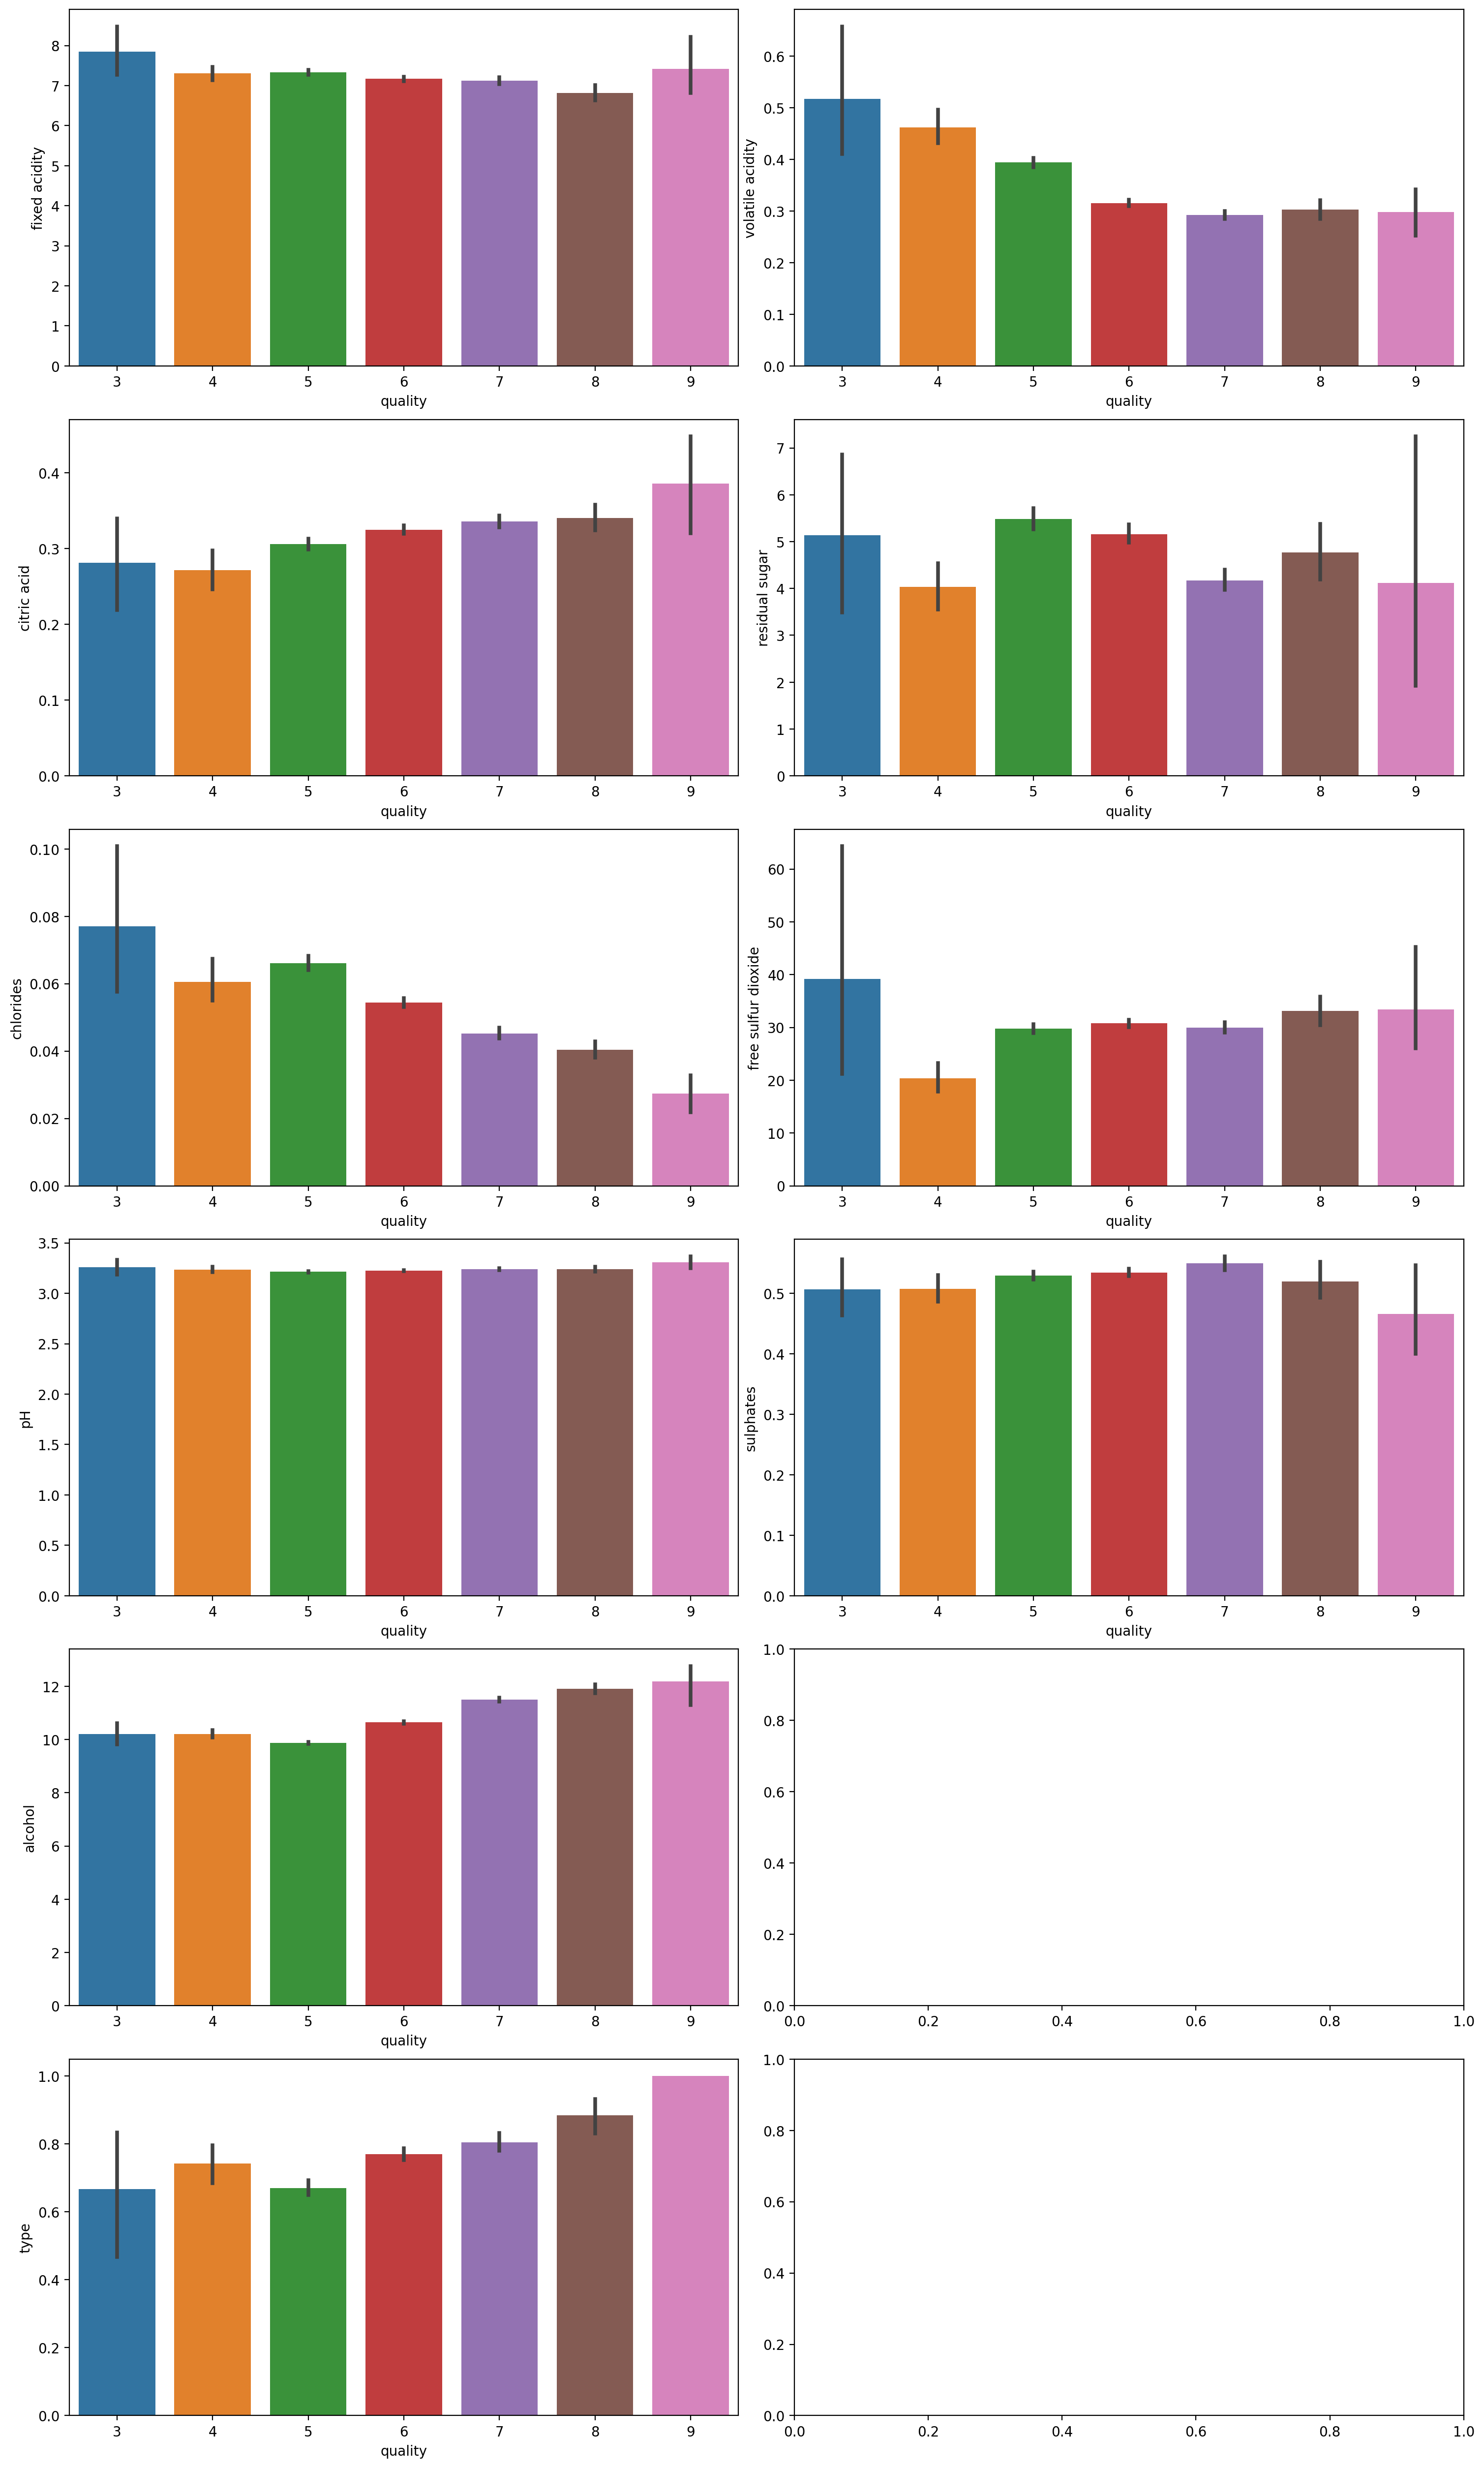

In [21]:
fig, ax = plt.subplots(ncols=2, nrows=6, figsize=(15, 25), dpi =200)
ax = ax.flatten()
index = 0
for i in df.columns:
    if i != 'quality':
        sns.barplot(x='quality', y=i, data=df, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

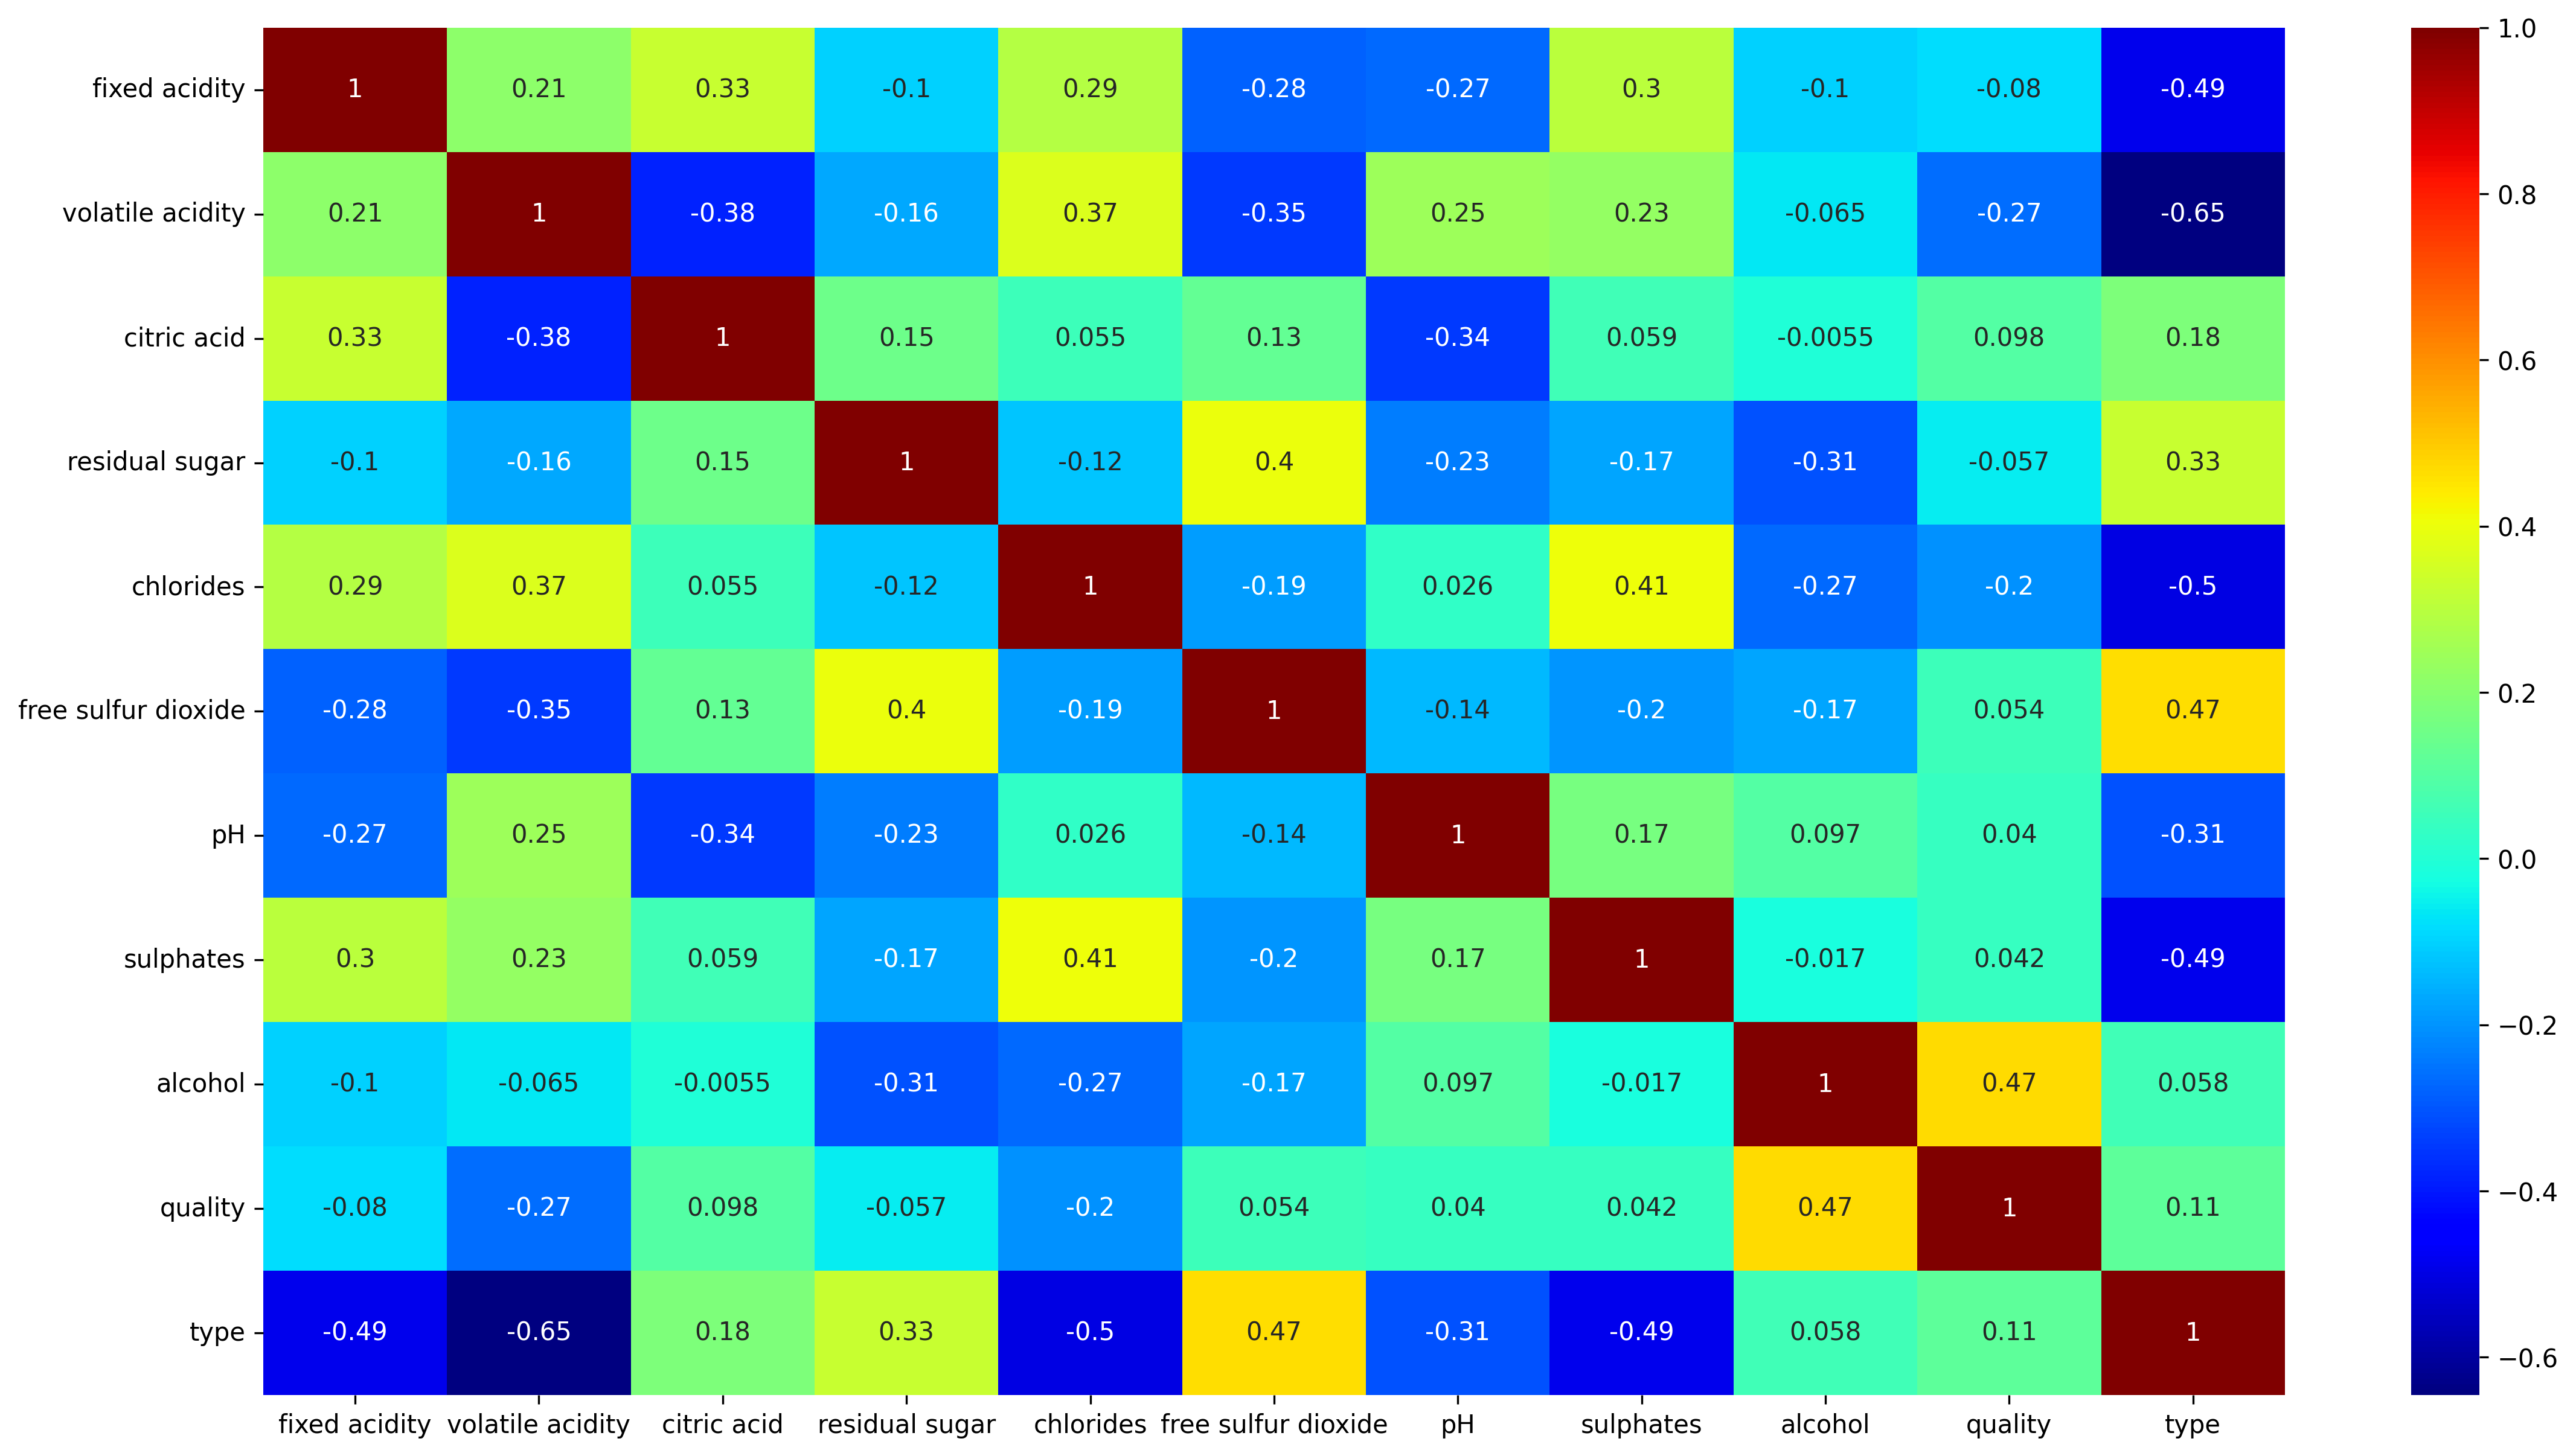

In [22]:
plt.figure(figsize=[18,10], dpi=300)
sns.heatmap(df.corr(),annot=True, cmap = 'jet')
plt.show()

In [23]:
matrix = df.corr()
matrix['quality']

fixed acidity         -0.080092
volatile acidity      -0.265205
citric acid            0.097954
residual sugar        -0.056830
chlorides             -0.202137
free sulfur dioxide    0.054002
pH                     0.039733
sulphates              0.041884
alcohol                0.469422
quality                1.000000
type                   0.114809
Name: quality, dtype: float64

## -----------

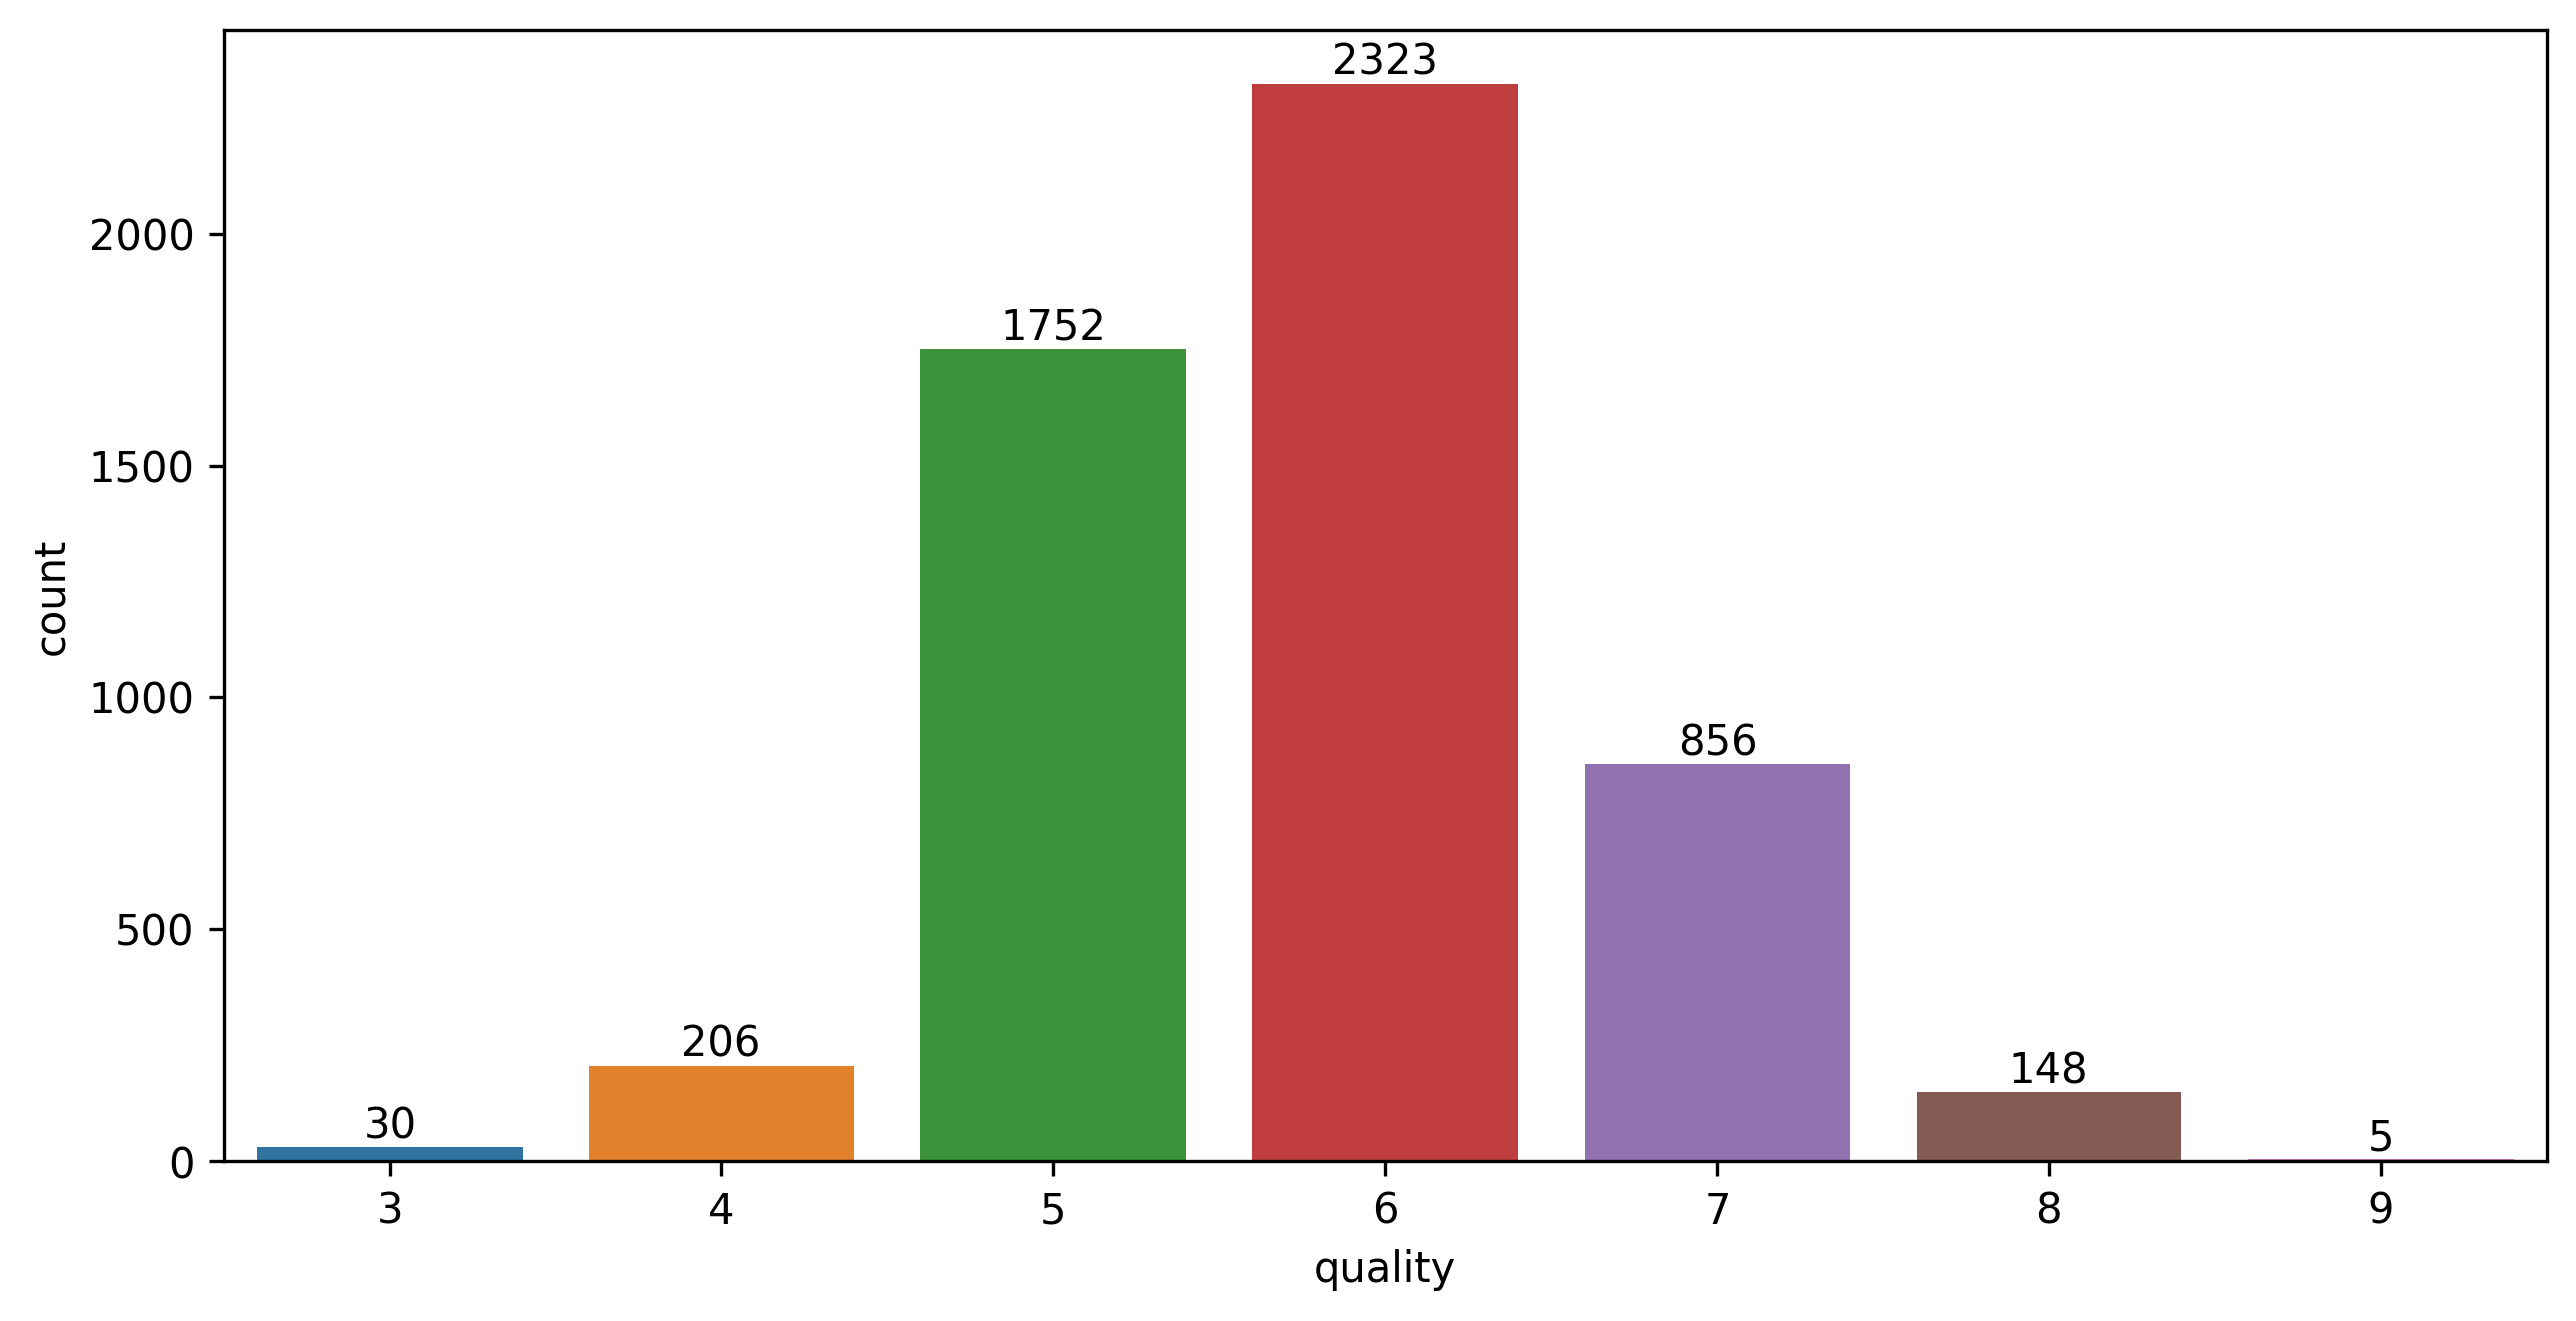

In [24]:
ax = sns.countplot(data = df, x = 'quality')

for i in ax.containers:
    ax.bar_label(i)

# ----------------------

In [25]:
bins = (3, 6, 9)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1554            7.9              0.42         0.49             8.2      0.056   
4281            5.7              0.26         0.24            17.8      0.059   
511             7.8              0.34         0.35             1.8      0.042   
556            10.9              0.53         0.49             4.6      0.118   
1505            9.2              0.18         0.49             1.5      0.041   
1274            7.8              0.58         0.13             2.1      0.102   
1404            9.0              0.31         0.48             6.6      0.043   
3111            6.5              0.23         0.39             1.9      0.036   
4566            8.6              0.36         0.26            11.1      0.030   
2346            7.7              0.28         0.63            11.1      0.039   

      free sulfur dioxide    pH  sulphates  alcohol quality  type  
1554                 32.0  3.29       0.60     11.2    good     1  
4281                 23.0  3.30       0.50     10.1     bad     1  
511                   8.0  3.11       0.41     12.1     bad     1  
556                  10.0  3.07       0.56     11.7     bad     0  
1505                 39.0  3.04       0.49      9.8    good     1  
1274                 17.0  3.24       0.53     11.2     bad     0  
1404                 11.0  2.90       0.38     11.6     bad     1  
3111                 41.0  3.19       0.43     11.9    good     1  
4566                 43.5  3.03       0.49     12.0     bad     1  
2346                 58.0  3.08       0.44      8.8     bad     1

In [26]:
df['quality'].value_counts()

bad     4281
good    1009
Name: quality, dtype: int64

#### `Quality of 0 is bad, 1 is good`

In [27]:
df['quality'] = df['quality'].map({'bad' : 0, 'good' : 1})
df.sample(10)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3502            6.7              0.29         0.45            14.3      0.054   
1796            7.1              0.37         0.32             1.4      0.037   
3799            7.0              0.30         0.28             2.2      0.042   
3840            6.7              0.37         0.25             2.5      0.028   
1533            8.0              0.39         0.30             1.9      0.074   
4807            6.0              0.17         0.30             7.3      0.039   
728             6.4              0.16         0.31             5.3      0.043   
652            15.9              0.36         0.65             7.5      0.096   
4886            6.2              0.21         0.28             5.7      0.028   
4740            6.0              0.32         0.46             1.5      0.050   

      free sulfur dioxide    pH  sulphates  alcohol quality  type  
3502                 30.0  3.14       0.57     9.10       0     1  
1796                 27.0  3.19       0.62    12.00       0     1  
3799                 21.0  3.20       0.57    11.40       0     1  
3840                 24.0  3.14       0.36    11.70       0     1  
1533                 32.0  3.39       0.61     9.00       0     0  
4807                 39.0  2.91       0.57    11.00       0     1  
728                  42.0  3.35       0.47    10.50       0     1  
652                  22.0  2.98       0.84    14.90       0     0  
4886                 45.0  3.21       1.08    12.15       1     1  
4740                 56.0  3.24       0.49     9.60       0     1

In [28]:
df1 = df.dropna()
df1.shape

(5290, 11)

In [29]:
X = df1.drop(columns = ['quality'], axis=1)
y = df1['quality']

In [30]:
y.value_counts()

0    4281
1    1009
Name: quality, dtype: int64

0    4281
1    1009
Name: quality, dtype: int64


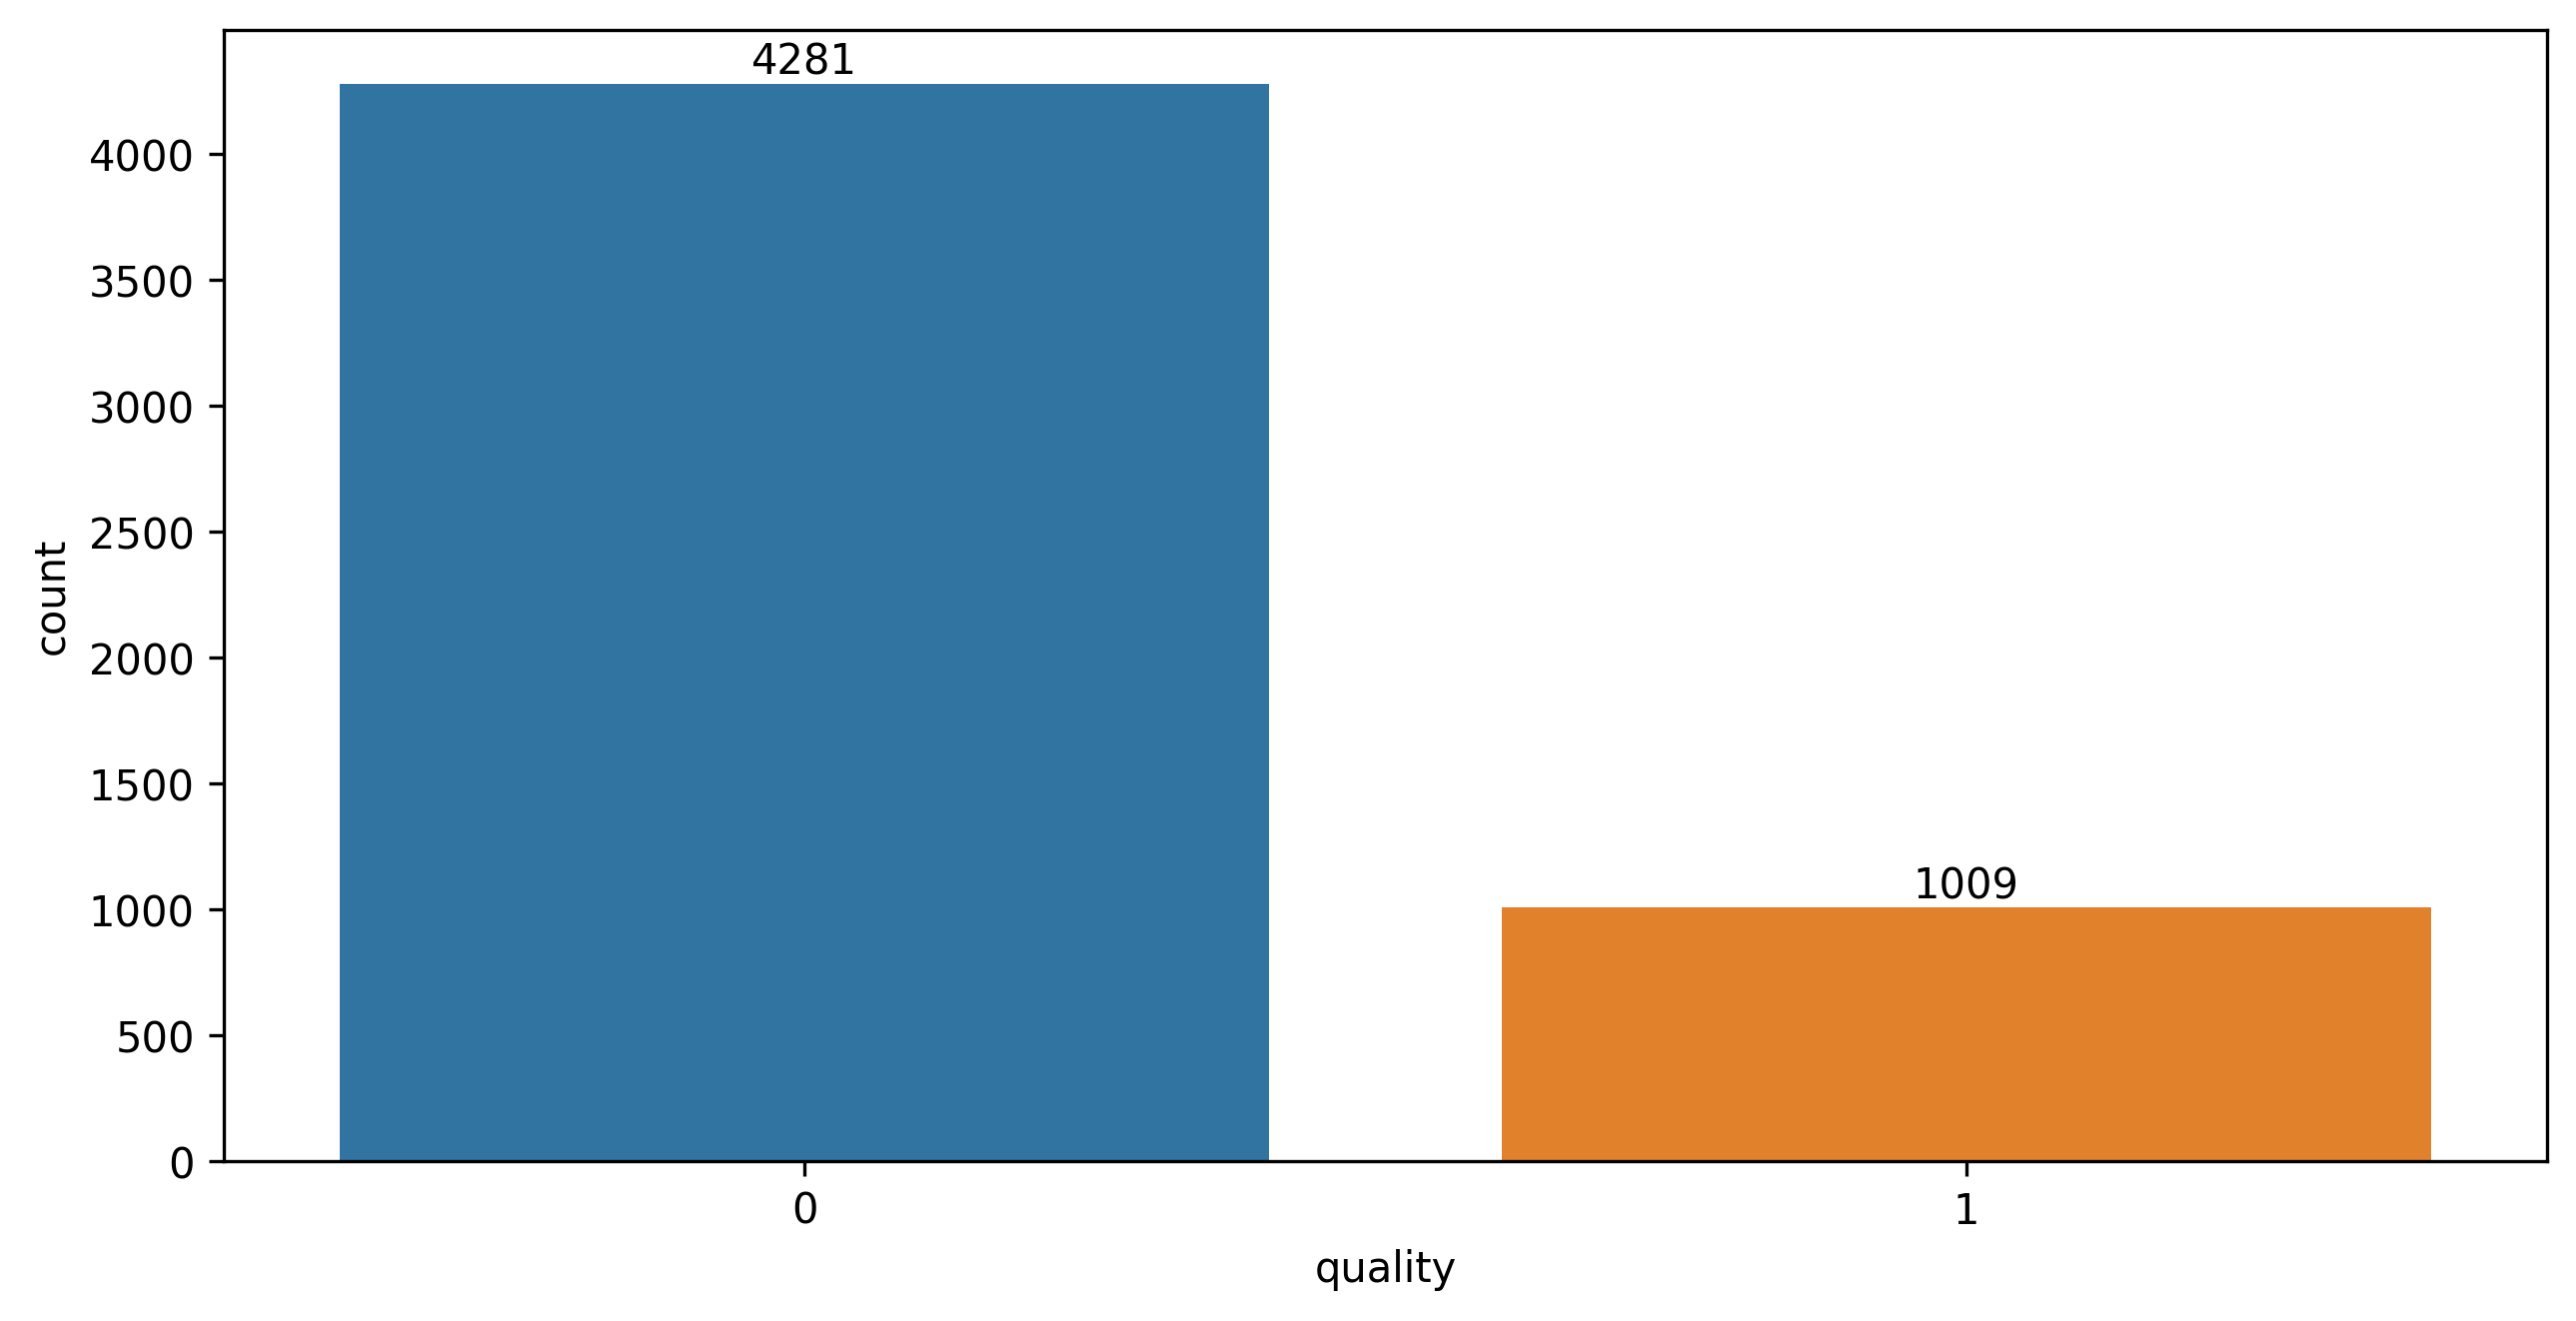

In [31]:
print(df1['quality'].value_counts())
ax = sns.countplot(data = df1, x = 'quality')
for i in ax.containers:
    ax.bar_label(i)

plt.show()

In [32]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)

X,y = oversample.fit_resample(X,y)

In [33]:
y.value_counts()

0    4281
1    4281
Name: quality, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [35]:
warnings.filterwarnings(action = 'once')

In [36]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## =====================================================================

# <font color = 'teal'> Applying Machine Learning 

## =====================================================================

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay, mean_squared_error, classification_report
#from sklearn.metrics import mean_squared_error
import numpy as np
def classify(model):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print('Accuracy of this model is: ', model.score(X_test,y_test))
    print('='*100)
    fig, ax = plt.subplots(figsize=(15,7),dpi=100)
    print(classification_report(y_test,pred))
    print('='*100)
    MSE = mean_squared_error(y_test,pred)
    RMSE = np.sqrt(MSE)
    print('mean squared error is : ',MSE)
    print('root mean squared error is : ',RMSE)
    print('='*100)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
    ax.set_title('Confusion Matrix')
    plt.show()

## <font color = 'darkorange'> Naive Bayes

Accuracy of this model is:  0.6935201401050788
              precision    recall  f1-score   support

           0       0.76      0.57      0.65       860
           1       0.65      0.82      0.73       853

    accuracy                           0.69      1713
   macro avg       0.71      0.69      0.69      1713
weighted avg       0.71      0.69      0.69      1713

mean squared error is :  0.3064798598949212
root mean squared error is :  0.5536062318064359


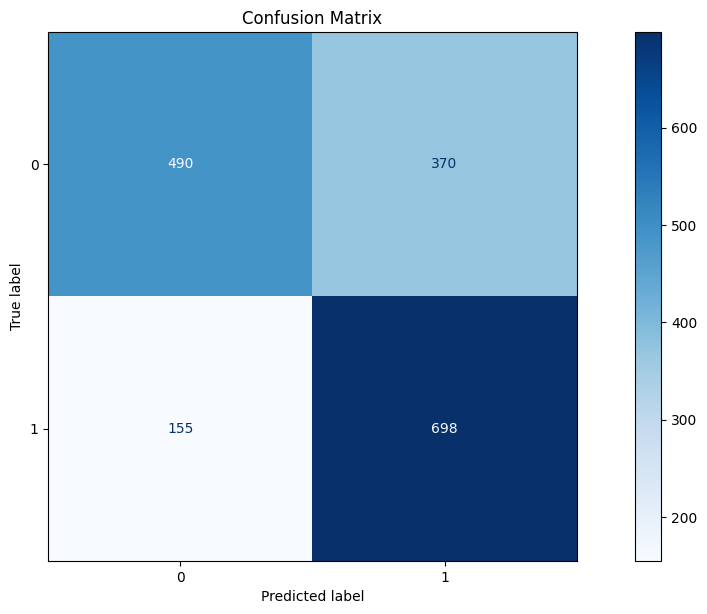

In [38]:
naiveBayesGBmodel = GaussianNB()
classify(naiveBayesGBmodel)

### `Conclusion` : 
####  <font color = 'darkred'>  Naive Bayes is an okay model for our problem statement. 

## <font color = 'darkorange'> Bagging

Accuracy of this model is:  0.6935201401050788
              precision    recall  f1-score   support

           0       0.76      0.57      0.65       860
           1       0.65      0.82      0.73       853

    accuracy                           0.69      1713
   macro avg       0.71      0.69      0.69      1713
weighted avg       0.71      0.69      0.69      1713

mean squared error is :  0.3064798598949212
root mean squared error is :  0.5536062318064359


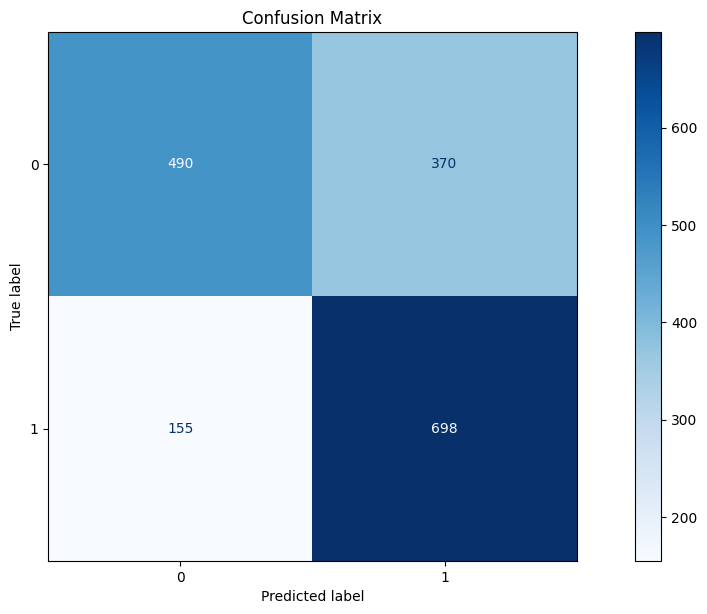

In [40]:
bag_model_nbg = BaggingClassifier(
    base_estimator=GaussianNB(),     
    n_estimators=100,
    max_samples=0.75,
    oob_score=False
)
classify(bag_model_nbg)

`Bagging did some of work ,not that significant though so we can, for time being safely put this algorithm in the ballot of effiecient algorithm`

## <font color = 'darkorange'> Support Vector Machine 

Accuracy of this model is:  0.7985989492119089
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       860
           1       0.76      0.88      0.81       853

    accuracy                           0.80      1713
   macro avg       0.81      0.80      0.80      1713
weighted avg       0.81      0.80      0.80      1713

mean squared error is :  0.20140105078809106
root mean squared error is :  0.44877728417121454


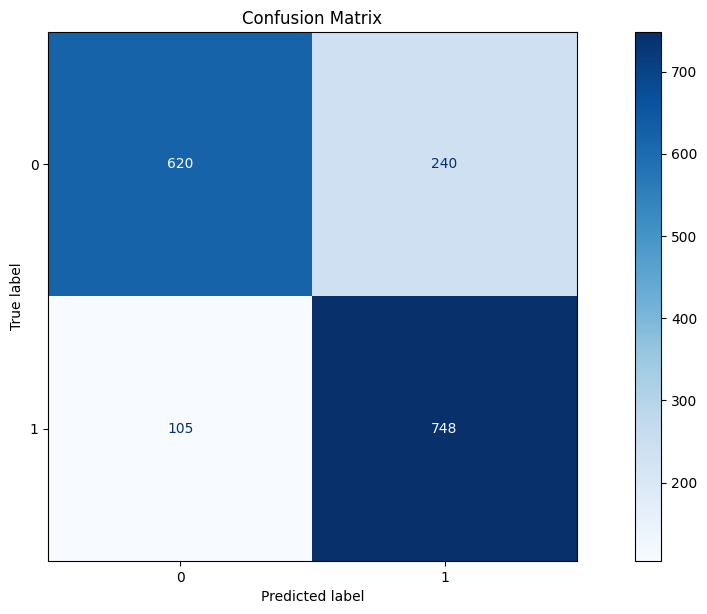

In [41]:
svm_model = SVC()
classify(svm_model)

## <font color = 'darkorange'> Bagging with Support Vector Machine 

Accuracy of this model is:  0.7985989492119089
              precision    recall  f1-score   support

           0       0.85      0.73      0.78       860
           1       0.76      0.87      0.81       853

    accuracy                           0.80      1713
   macro avg       0.80      0.80      0.80      1713
weighted avg       0.80      0.80      0.80      1713

mean squared error is :  0.20140105078809106
root mean squared error is :  0.44877728417121454


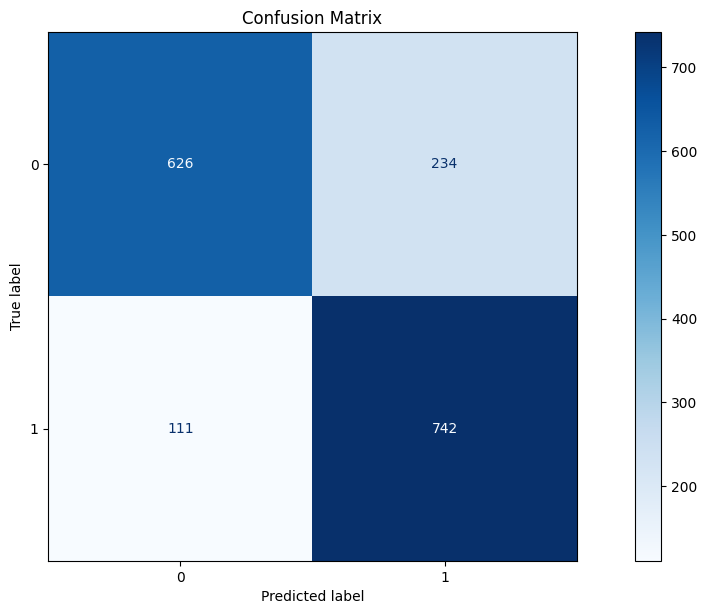

In [43]:
bag_model_svm = BaggingClassifier(
                        base_estimator = SVC(),
                        n_estimators=50,    
                        max_samples=0.8 ,    
                        oob_score=False
                                )
classify(bag_model_svm)

### `Conclusion` : 
####   <font color = 'teal'> Support Vector Machine is an agreeable model (as of now) for our problem statement. We shall later do hyperparameter tuning to examine if the score can be improved.

## <font color = 'darkorange'> Logistic Regression

Accuracy of this model is:  0.7478108581436077
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       860
           1       0.73      0.78      0.75       853

    accuracy                           0.75      1713
   macro avg       0.75      0.75      0.75      1713
weighted avg       0.75      0.75      0.75      1713

mean squared error is :  0.2521891418563923
root mean squared error is :  0.5021843703824247


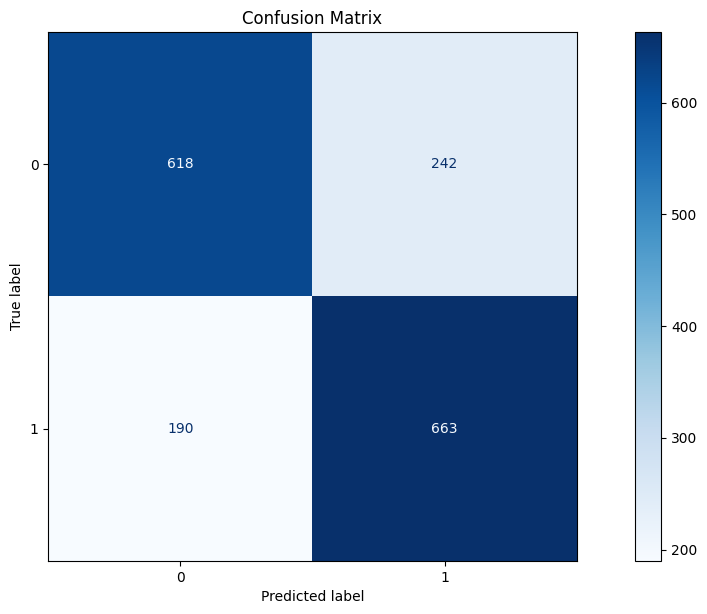

In [44]:
lr = LogisticRegression()
classify(lr)

## <font color = 'darkorange'> Decision Tree Classifier

Accuracy of this model is:  0.7764156450671337
              precision    recall  f1-score   support

           0       0.80      0.73      0.77       860
           1       0.75      0.82      0.78       853

    accuracy                           0.78      1713
   macro avg       0.78      0.78      0.78      1713
weighted avg       0.78      0.78      0.78      1713

mean squared error is :  0.22358435493286632
root mean squared error is :  0.4728470735162335


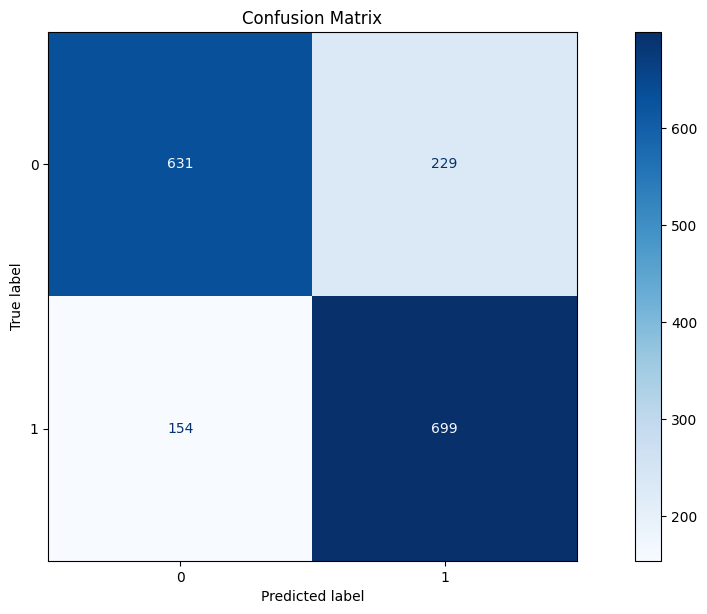

In [45]:
dt = DecisionTreeClassifier()
classify(dt)

## <font color = 'darkorange'> KNN

Accuracy of this model is:  0.8114419147694104
              precision    recall  f1-score   support

           0       0.90      0.70      0.79       860
           1       0.75      0.92      0.83       853

    accuracy                           0.81      1713
   macro avg       0.83      0.81      0.81      1713
weighted avg       0.83      0.81      0.81      1713

mean squared error is :  0.18855808523058962
root mean squared error is :  0.43423275467264055


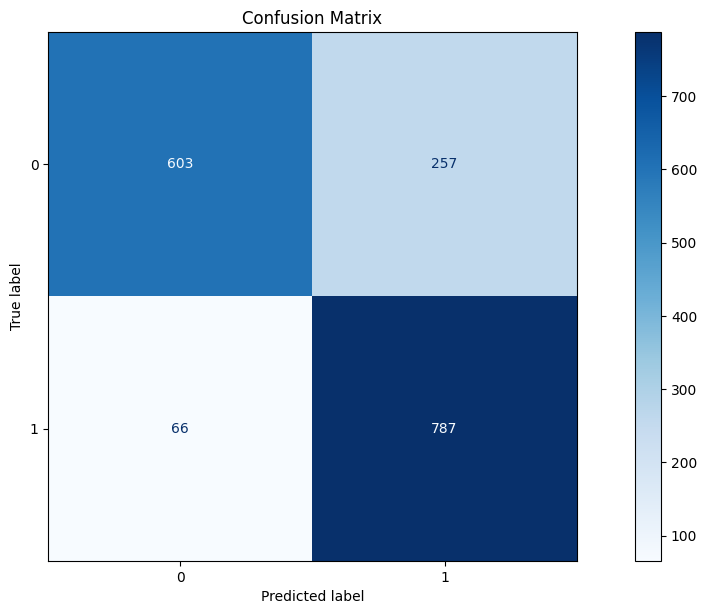

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
classify(knn)

## <font color = 'darkorange'> Random Forest Classifier

Accuracy of this model is:  0.8733216579100992
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       860
           1       0.84      0.93      0.88       853

    accuracy                           0.87      1713
   macro avg       0.88      0.87      0.87      1713
weighted avg       0.88      0.87      0.87      1713

mean squared error is :  0.12667834208990075
root mean squared error is :  0.35591901057670516


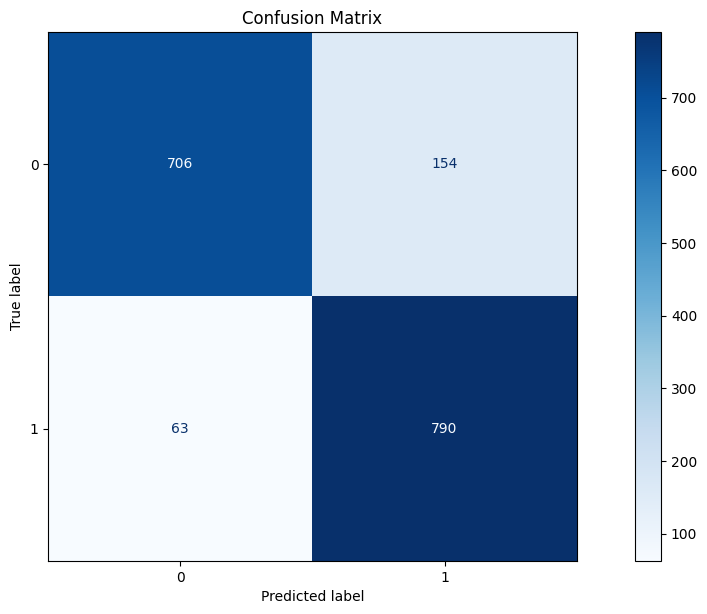

In [47]:
random_forest_model = RandomForestClassifier()
classify(random_forest_model)

### `Observations`
    Random Forest is now our prime model for our dataset 
    
    We will tune it to get better results

## <font color = 'darkorange'> Random Forest Classifier with hypertuning

## <font color = 'aqua'> Parameters Hypertuning

In [48]:
crit = ['gini', 'logloss', 'entropy']
n_estim = [100,200,300]
max_feat = ['sqrt', 'log2']


clf = GridSearchCV(RandomForestClassifier(),{
                        # 'criterion':crit,
                        'n_estimators':n_estim
                        # 'max_features':max_feat
                                },
                  cv = 8, return_train_score=False)

Accuracy of this model is:  0.8727378867483946
              precision    recall  f1-score   support

           0       0.91      0.83      0.87       860
           1       0.84      0.92      0.88       853

    accuracy                           0.87      1713
   macro avg       0.88      0.87      0.87      1713
weighted avg       0.88      0.87      0.87      1713

mean squared error is :  0.12726211325160536
root mean squared error is :  0.35673815782952817


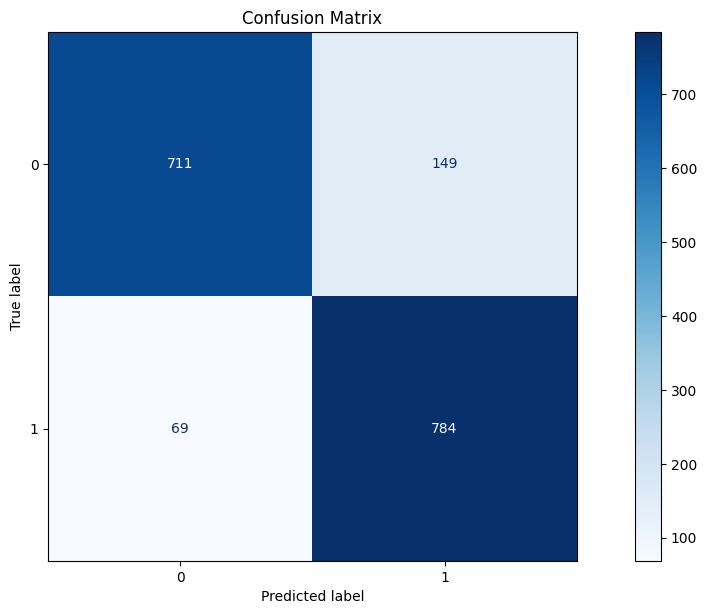

In [49]:
classify(clf)

## <font color = 'aqua'> Accuracy Comparison

In [50]:
modelNames = ['Logistic Regression', 'K-Nearest Neighbour', 'Support Vector', 'Naive Bayes', 'Random Forrest']
modelClassifiers = [lr, knn, svm_model, naiveBayesGBmodel, random_forest_model]
models = pd.DataFrame({'modelNames' : modelNames, 'modelClassifiers' : modelClassifiers})
counter=0
score=[]
for i in models['modelClassifiers']:
  accuracy = cross_val_score(i, X_train, y_train, scoring='accuracy', cv=10)
  print('Accuracy of %s Classification model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
  score.append(accuracy.mean())
  counter+=1

Accuracy of Logistic Regression Classification model is 0.77
Accuracy of K-Nearest Neighbour Classification model is 0.82
Accuracy of Support Vector Classification model is 0.81
Accuracy of Naive Bayes Classification model is 0.71
Accuracy of Random Forrest Classification model is 0.88


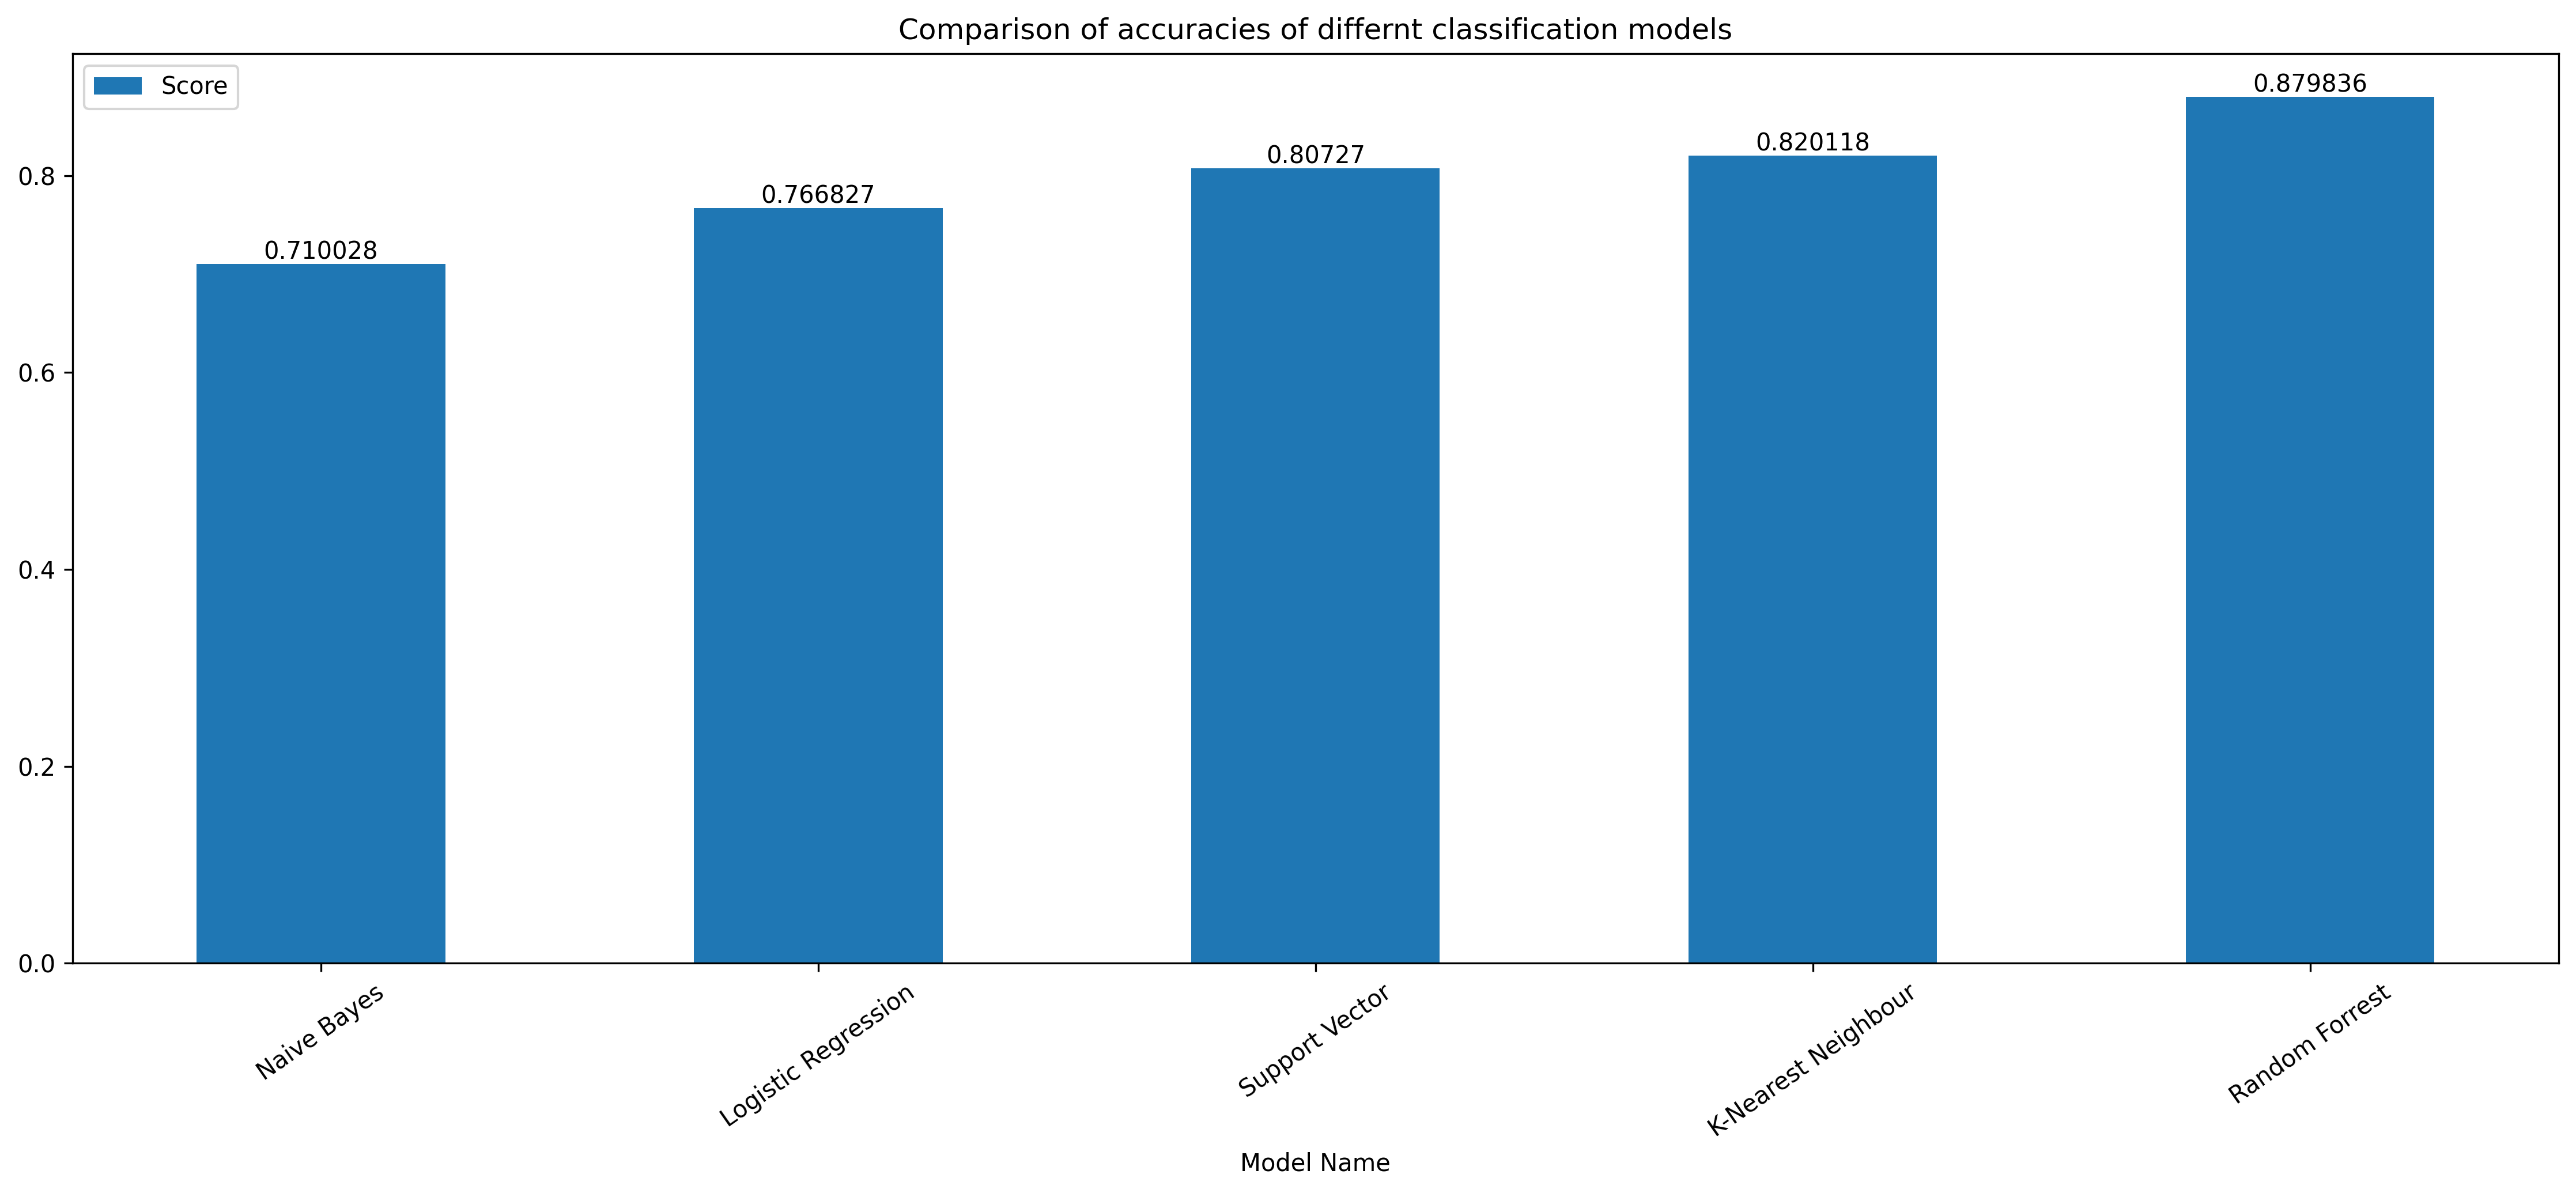

In [51]:
ax = pd.DataFrame({'Model Name' : modelNames,'Score' : score}).sort_values(by='Score', ascending=True).plot(x=0, y=1, kind='bar', figsize=(15,7),
                        title='Comparison of accuracies of differnt classification models')
for i in ax.containers:
    ax.bar_label(i)
    
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

## <font color = 'aqua'> Cross Validation

In [52]:
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode()
from sklearn.model_selection import cross_val_score, StratifiedKFold

In [53]:
classifier_names = ['Decision Tree','Random Forest', 
                    'SVC', 
                    'K Nearest Neighbors',
                    'Logistic Regression'
                    ]

classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               SVC(),
               KNeighborsClassifier(),
               LogisticRegression()]

In [63]:
import numpy as np
plot_data=[]

clf_data=zip(classifier_names, classifiers)

In [64]:
for clf_name, clf in clf_data:
    print('Running ' + clf_name)
    kf = StratifiedKFold(n_splits=10, shuffle=True)
    scores = cross_val_score(clf, X_test, y_test, cv=kf)
    avg_score = np.mean(scores)
    print(scores)
    print("Average accuracy:", avg_score)

    # Add classifier line with average in legend
    plot_data.append(
        go.Scatter(
            x=[i + 1 for i in range(10)],
            y=scores,
            mode='lines+markers',
            name=f"{clf_name} (Avg: {avg_score:.2f})"
        )
    )


Running Decision Tree
[0.72674419 0.78488372 0.78488372 0.77192982 0.71929825 0.70760234
 0.70175439 0.70760234 0.73684211 0.76023392]
Average accuracy: 0.7401774785801714
Running Random Forest
[0.80232558 0.81976744 0.77325581 0.80701754 0.84210526 0.8245614
 0.80701754 0.78362573 0.84795322 0.85380117]
Average accuracy: 0.8161430708554331
Running SVC
[0.75       0.86627907 0.75581395 0.83040936 0.86549708 0.7251462
 0.74269006 0.80116959 0.8245614  0.74269006]
Average accuracy: 0.7904256765945872
Running K Nearest Neighbors
[0.76162791 0.78488372 0.75581395 0.77777778 0.78947368 0.76608187
 0.76608187 0.77777778 0.83625731 0.77192982]
Average accuracy: 0.7787705698354414
Running Logistic Regression
[0.78488372 0.73837209 0.76744186 0.79532164 0.73099415 0.66666667
 0.75438596 0.74853801 0.77777778 0.78362573]
Average accuracy: 0.7548007615939072


In [65]:
layout = go.Layout(
    xaxis=dict(
        title='Fold no.'
    ),
    yaxis=dict(
        range=[np.min([i['y'] for i in plot_data]), 1],
        title='Accuracy'
    )
)
fig=go.Figure(data=plot_data, layout=layout)
ply.iplot(fig)

# $$ Conclusion $$ 

`Random Forrest Classification model` gave the best accuracy and can be considered as a good model for predictiong the quality of wine for this problem.

However other models like `Logistic Regression, KNN and SVC` also have `comparable score` to Random Forrest and may also be used to predict quality of wine.

`Naive Bayes model gave the least accuracy`, which can be considered bad model to predict the quality of fine.

Performance tuning using methods like Grid Search, etc. can be done to improve the accuracy of these models. So, accuracy of these models will improve and we might get another best model for our problem.

## $$ Thank \ You $$

In [57]:
from IPython.display import HTML

HTML('<img src="https://media0.giphy.com/media/35pTQFiy14OeA/giphy.gif?cid=ecf05e47iaab86rhl57s3fs6626bz292lwc3fjh2pe7tvyj2&rid=giphy.gif&ct=g" style="display=block; margin:auto"/>')